# ***Upload and Load dataset***

In [ ]:
#Upload dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/UM-Internship/financial_data.csv')

# ***Data Cleaning***

In [ ]:
#Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [ ]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [ ]:
#Change datatype for column
df['Units Sold'] = (df['Units Sold'].astype(str).str.replace(r'[\$,]', '', regex=True).str.strip().astype(float).round().astype(int))
df['Manufacturing Price'] = df['Manufacturing Price'].astype(str).str.replace(r'[\$,]', '', regex=True).str.strip().astype(float)
df['Sale Price'] = df['Sale Price'].astype(str).str.replace(r'[\$,]', '', regex=True).str.strip().astype(float)
df['Gross Sales'] = df['Gross Sales'].astype(str).str.replace(r'[\$,]', '', regex=True).str.strip().astype(float)
df['Discounts'] = df['Discounts'].astype(str).str.replace(r'[\$,]', '', regex=True).str.replace('-', '0', regex=False).str.strip().astype(float)
df['Sales'] = df['Sales'].astype(str).str.replace(r'[\$,]', '', regex=True).str.strip().astype(float)
df['COGS'] = df['COGS'].astype(str).str.replace(r'[\$,]', '', regex=True).str.strip().astype(float)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
#Change column - Profit
import numpy as np

df['Profit'] = (
    df['Profit']
      .astype(str)
      .str.replace(r'[\$,]', '', regex=True)
      .str.replace(r'[\(\)]', '', regex=True)
      .str.strip()
      .replace({'-': '0', '': '0'})
)

# Convert parentheses values into negative numbers
df['Profit'] = df['Profit'].apply(lambda x: -float(x) if '(' in str(x) else float(x))

In [ ]:
#Display duplicate rows on the dataset
df.duplicated().sum()

np.int64(0)

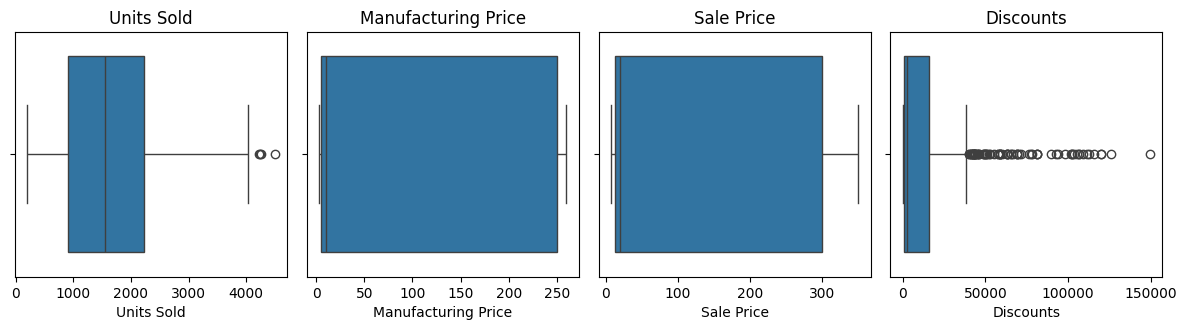

In [ ]:
#Display outliers in the numerical columns using boxplot
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Units Sold', 'Manufacturing Price', 'Sale Price',
                     'Discounts']

plt.figure(figsize=(12, 6))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
#Data error inconsistency
df['Gross_Sales'] = df['Units Sold'] * df['Sale Price']
df['Sales_'] = df['Gross Sales'] - df['Discounts']
df['COGS_'] = df['Units Sold'] * df['Manufacturing Price']
df['Profit_'] = df['Sales'] - df['COGS']

In [ ]:
#Drop columns
df.drop(columns=['Gross Sales', 'Sales', 'COGS', 'Profit'], inplace=True)

In [ ]:
#Check Date consistency - Year and Month Number
df['check_year'] = df['Date'].dt.year
df['check_month_num'] = df['Date'].dt.month

year_mismatch = df[df['check_year'] != df['Year']]
print("Year mismatches:", len(year_mismatch))

month_num_mismatch = df[df['check_month_num'] != df['Month Number']]
print("Month number mismatches:", len(month_num_mismatch))

Year mismatches: 0
Month number mismatches: 0


In [ ]:
#Check Date consistency - Month Name
df['Month Name'] = df['Month Name'].str.strip().str.title()

df['check_month_num'] = df['Date'].dt.month
df['check_month_name'] = df['Date'].dt.month_name()

month_name_mismatch = df[df['check_month_name'] != df['Month Name']]
print("Month name mismatches:", len(month_name_mismatch))

Month name mismatches: 0


In [ ]:
#Drop columns
df.drop(columns=['check_year', 'check_month_num', 'check_month_name'], inplace=True)

# ***Data Understanding***

In [ ]:
#Display cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    int64         
 5   Manufacturing Price  700 non-null    float64       
 6   Sale Price           700 non-null    float64       
 7   Discounts            700 non-null    float64       
 8   Date                 700 non-null    datetime64[ns]
 9   Month Number         700 non-null    int64         
 10  Month Name           700 non-null    object        
 11  Year                 700 non-null    int64         
 12  Gross_Sales          700 non-null    float64       
 13  Sales_               700 non-null  

In [ ]:
#Display summary statistics of the dataset
df.describe()

Units Sold  Manufacturing Price  Sale Price      Discounts  \
count   700.000000           700.000000  700.000000     700.000000   
mean   1608.294286            96.477143  118.428571   13150.354657   
min     200.000000             3.000000    7.000000       0.000000   
25%     905.000000             5.000000   12.000000     800.320000   
50%    1542.500000            10.000000   20.000000    2585.250000   
75%    2229.500000           250.000000  300.000000   15956.347500   
max    4492.000000           260.000000  350.000000  149677.500000   
std     867.432720           108.602612  136.775515   22962.928765   

                      Date  Month Number         Year   Gross_Sales  \
count                  700    700.000000   700.000000  7.000000e+02   
mean   2014-04-28 21:36:00      7.900000  2013.750000  1.827591e+05   
min    2013-09-01 00:00:00      1.000000  2013.000000  1.799000e+03   
25%    2013-12-24 06:00:00      5.750000  2013.750000  1.739175e+04   
50%    2014-05-16 12:00:00      9.000000  2014.000000  3.798000e+04   
75%    2014-09-08 12:00:00     10.250000  2014.000000  2.790250e+05   
max    2014-12-01 00:00:00     12.000000  2014.000000  1.207500e+06   
std                    NaN      3.377321     0.433322  2.542621e+05   

             Sales_         COGS_        Profit_  
count  7.000000e+02  7.000000e+02     700.000000  
mean   1.696091e+05  1.523751e+05   24133.860386  
min    1.655080e+03  6.420000e+02  -40617.500000  
25%    1.592800e+04  8.628750e+03    2805.960000  
50%    3.554020e+04  2.437500e+04    9242.200000  
75%    2.610775e+05  2.510925e+05   22662.000000  
max    1.159200e+06  1.097200e+06  262200.000000  
std    2.367263e+05  2.137167e+05   42760.626558

In [ ]:
#Display summary statistics about the categorical variables
df.describe(include='object')

Segment Country  Product Discount Band Month Name
count          700     700      700           700        700
unique           5       5        6             4         12
top     Government  Canada   Paseo          High     October
freq           300     140      202           245        140

In [ ]:
#Display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# ***Statistical Validation***

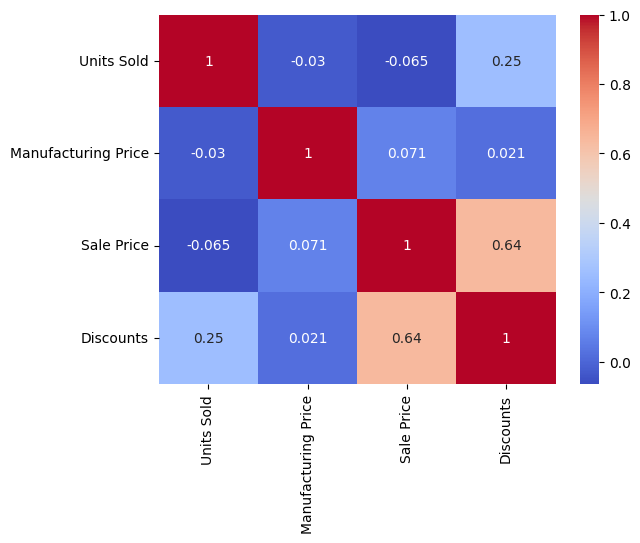

In [ ]:
#Correlation Analysis
corr = df[['Units Sold','Manufacturing Price','Sale Price','Discounts'
           ]].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#ANOVA Analysis
import numpy as np
import scipy.stats as stats
import pandas as pd

categorical_cols = ['Segment', 'Country', 'Product', 'Discount Band', 'Month Name']
numeric_cols = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Discounts',
                'Gross_Sales', 'Sales_', 'COGS_', 'Profit_']

anova_results = []

for cat in categorical_cols:
    for num in numeric_cols:
        groups = []
        for _, g in df.groupby(cat):
            vals = g[num].dropna().values
            if len(vals) > 1 and np.var(vals, ddof=1) > 0:
                groups.append(vals)

        if len(groups) > 1:
            f_stat, p_value = stats.f_oneway(*groups)
        else:
            f_stat, p_value = np.nan, np.nan

        anova_results.append([cat, num, f_stat, p_value])

anova_df = pd.DataFrame(anova_results,
                        columns=["Categorical Variable", "Numeric Variable", "F-Statistic", "p-Value"])

significant = anova_df.dropna().query("`p-Value` < 0.05").sort_values("p-Value")

print("Significant Results:")
print(significant)

Significant Results:
   Categorical Variable Numeric Variable  F-Statistic        p-Value
22              Product            COGS_   266.028554  1.266842e-158
4               Segment      Gross_Sales    69.211747   2.508497e-49
5               Segment           Sales_    67.745186   2.025507e-48
3               Segment        Discounts    44.316770   3.707360e-33
7               Segment          Profit_    36.468457   1.079198e-27
27        Discount Band        Discounts    25.771115   1.710336e-11
31        Discount Band          Profit_    12.246716   8.138950e-08
32           Month Name       Units Sold     4.208593   4.669980e-06
8               Country       Units Sold     4.446068   1.486674e-03
35           Month Name        Discounts     2.136049   1.626875e-02
29        Discount Band           Sales_     2.781343   4.019543e-02


In [ ]:
#Tukey Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

significant_tests = [
    ("Product", "COGS_"),
    ("Segment", "Gross_Sales"),
    ("Segment", "Sales_"),
    ("Segment", "Discounts"),
    ("Segment", "Profit_"),
    ("Discount Band", "Discounts"),
    ("Discount Band", "Profit_"),
    ("Month Name", "Units Sold"),
    ("Country", "Units Sold"),
    ("Month Name", "Discounts"),
    ("Discount Band", "Sales_")
]

tukey_results = {}

for cat, num in significant_tests:
    print(f"\n{cat} → {num} (Significant Only)\n")

    data = df[[cat, num]].dropna()

    tukey = pairwise_tukeyhsd(endog=data[num],
                               groups=data[cat],
                               alpha=0.05)

    tukey_df = pd.DataFrame(data=tukey._results_table.data[1:],
                            columns=tukey._results_table.data[0])

    sig_only = tukey_df[tukey_df['reject'] == True]

    if sig_only.empty:
        print("No statistically significant differences found.")
    else:
        print(sig_only.to_string(index=False))

    tukey_results[(cat, num)] = sig_only


Product → COGS_ (Significant Only)

     group1      group2     meandiff  p-adj        lower        upper  reject
  Amarilla   Carretera  -424860.4468    0.0 -477351.8556 -372369.0381    True
  Amarilla     Montana  -421307.2318    0.0 -473798.6405 -368815.8230    True
  Amarilla       Paseo  -412852.9914    0.0 -457663.4171 -368042.5656    True
  Amarilla        Velo  -250780.9330    0.0 -301298.6447 -200263.2214    True
 Carretera         VTT   382377.6789    0.0  331714.3424  433041.0154    True
 Carretera        Velo   174079.5138    0.0  123416.1772  224742.8503    True
   Montana         VTT   378824.4638    0.0  328161.1273  429487.8004    True
   Montana        Velo   170526.2987    0.0  119862.9622  221189.6352    True
     Paseo         VTT   370370.2235    0.0  327715.7989  413024.6480    True
     Paseo        Velo   162072.0583    0.0  119417.6338  204726.4828    True
       VTT        Velo  -208298.1651    0.0 -256913.6448 -159682.6855    True

Segment → Gross_Sales (Sig

In [ ]:
#Chi-Square test
from scipy.stats import chi2_contingency
import pandas as pd
from itertools import combinations

categorical_cols = ['Segment', 'Country', 'Product', 'Discount Band', 'Month Name']

chi_results = []

for col1, col2 in combinations(categorical_cols, 2):
    contingency = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency)

    chi_results.append([col1, col2, chi2, p, dof])

chi_df = pd.DataFrame(chi_results,
                      columns=['Variable 1', 'Variable 2', 'Chi2 Statistic', 'p-value', 'Degrees of Freedom'])

significant_chi = chi_df[chi_df['p-value'] < 0.05].sort_values('p-value')
significant_chi

Variable 1     Variable 2  Chi2 Statistic   p-value  Degrees of Freedom
9  Discount Band     Month Name       60.141024  0.002669                  33
2        Segment  Discount Band       26.824629  0.008189                  12

In [ ]:
#Two way ANOVA
import warnings
warnings.filterwarnings("ignore", message="covariance of constraints does not have full rank")

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations

categorical_cols = ['Segment', 'Country', 'Product', 'Discount Band', 'Month Name']
numeric_cols = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Discounts',
                'Gross_Sales', 'Sales_', 'COGS_', 'Profit_']

twoway_results = []

for num in numeric_cols:
    for fac1, fac2 in combinations(categorical_cols, 2):
        formula = f'Q("{num}") ~ C(Q("{fac1}")) * C(Q("{fac2}"))'
        model = ols(formula, data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        for effect_name, row in anova_table.iterrows():
            if effect_name == 'Residual':
                continue

            twoway_results.append({
                'Numeric_Var': num,
                'Factor1': fac1,
                'Factor2': fac2,
                'Effect': effect_name,
                'sum_sq': row['sum_sq'],
                'df': row['df'],
                'F': row['F'],
                'p_value': row['PR(>F)']
            })

twoway_anova_df = pd.DataFrame(twoway_results)

significant_twoway = twoway_anova_df[twoway_anova_df['p_value'] < 0.05] \
                        .sort_values('p_value')
print("\nSignificant two-way ANOVA effects:")
print(significant_twoway)


Significant two-way ANOVA effects:
             Numeric_Var        Factor1        Factor2  \
43   Manufacturing Price        Country        Product   
34   Manufacturing Price        Segment        Product   
54   Manufacturing Price        Product     Month Name   
51   Manufacturing Price        Product  Discount Band   
201                COGS_        Product  Discount Band   
184                COGS_        Segment        Product   
193                COGS_        Country        Product   
204                COGS_        Product     Month Name   
66            Sale Price        Segment  Discount Band   
60            Sale Price        Segment        Country   
63            Sale Price        Segment        Product   
69            Sale Price        Segment     Month Name   
126          Gross_Sales        Segment  Discount Band   
120          Gross_Sales        Segment        Country   
156               Sales_        Segment  Discount Band   
150               Sales_        Segm

# ***Business Insights***

In [ ]:
#Display unique values of column - 'Segment', 'Country', Product', 'Discount Band' and 'Month Name'
print(df['Segment'].value_counts())
print("____________________________________")
print(df['Country'].value_counts())
print("____________________________________")
print(df['Product'].value_counts())
print("____________________________________")
print(df['Discount Band'].value_counts())
print("____________________________________")
print(df['Month Name'].value_counts())

Segment
Government          300
Midmarket           100
Channel Partners    100
Enterprise          100
Small Business      100
Name: count, dtype: int64
____________________________________
Country
Canada                      140
Germany                     140
France                      140
Mexico                      140
United States of America    140
Name: count, dtype: int64
____________________________________
Product
Paseo         202
Velo          109
VTT           109
Amarilla       94
Montana        93
Carretera      93
Name: count, dtype: int64
____________________________________
Discount Band
High       245
Medium     242
Low        160
None        53
Name: count, dtype: int64
____________________________________
Month Name
October      140
December     105
September     70
June          70
November      70
January       35
March         35
August        35
July          35
February      35
April         35
May           35
Name: count, dtype: int64


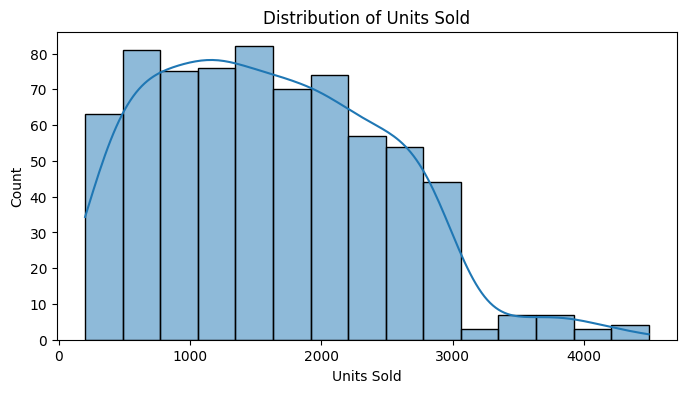

____________________________________


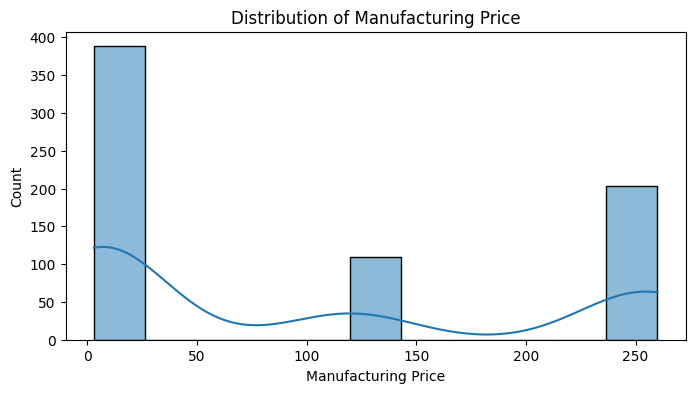

____________________________________


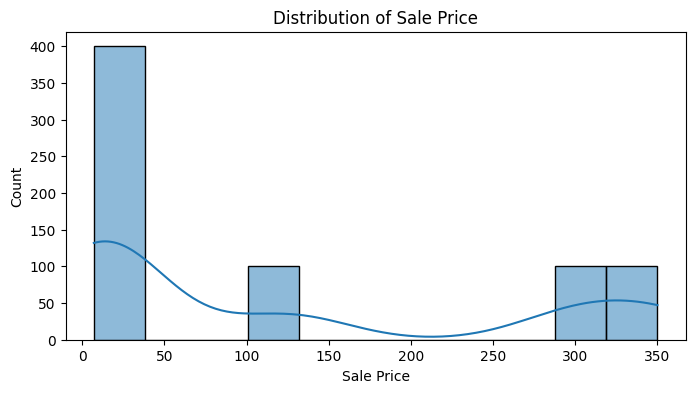

____________________________________


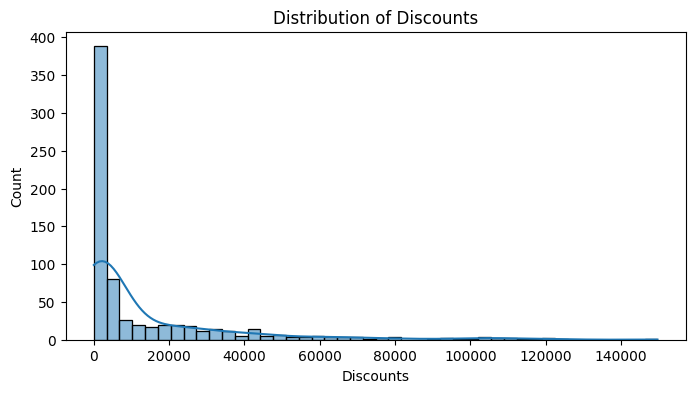

____________________________________


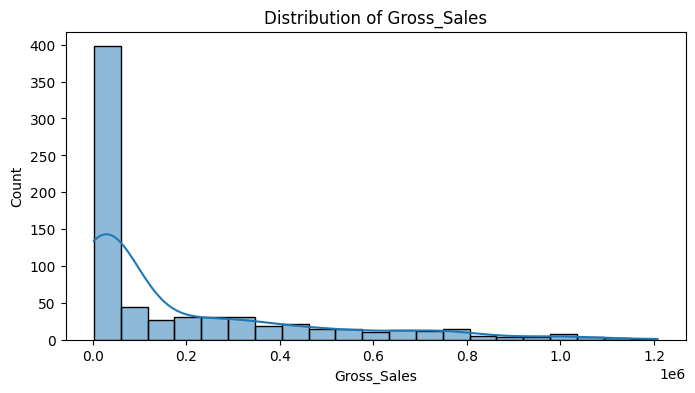

____________________________________


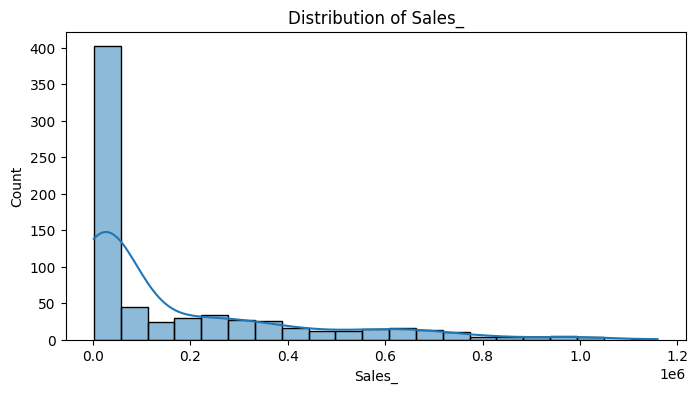

____________________________________


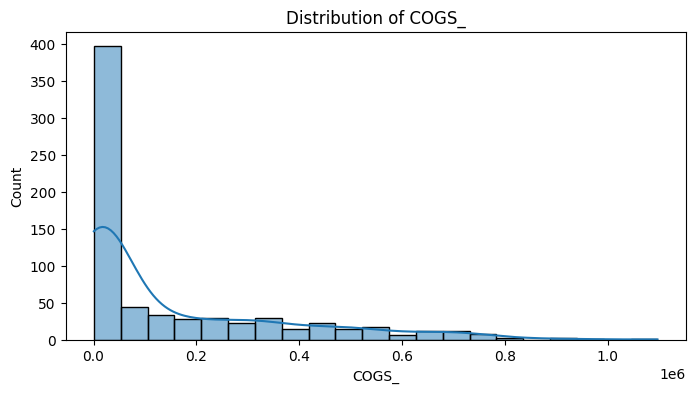

____________________________________


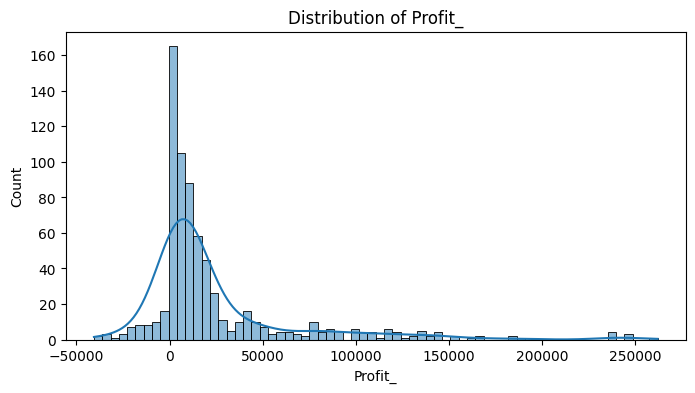

____________________________________


In [ ]:
#Display distribution of columns - 'Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross_Sales',
#'Discounts', 'Sales_', 'COGS_', 'Profit_'
num_cols = ['Units Sold','Manufacturing Price','Sale Price','Discounts',
            'Gross_Sales','Sales_','COGS_','Profit_']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    print("____________________________________")

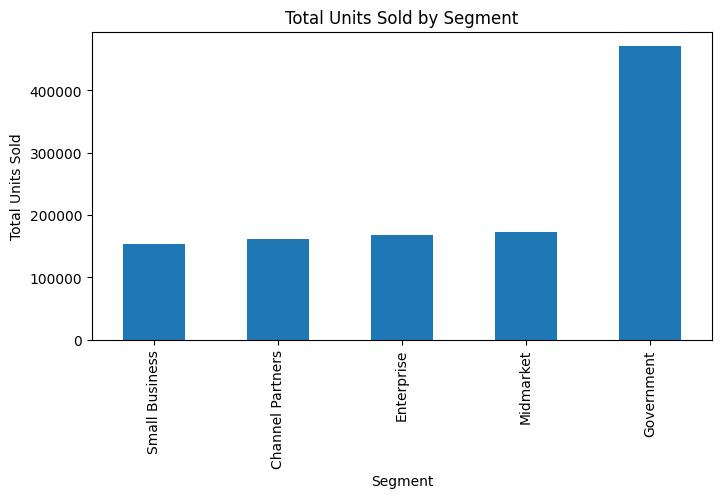

In [ ]:
#Total number of units sold per segment
plt.figure(figsize=(8,4))
df.groupby('Segment')['Units Sold'].sum().sort_values().plot(kind='bar')
plt.title("Total Units Sold by Segment")
plt.ylabel("Total Units Sold")
plt.show()

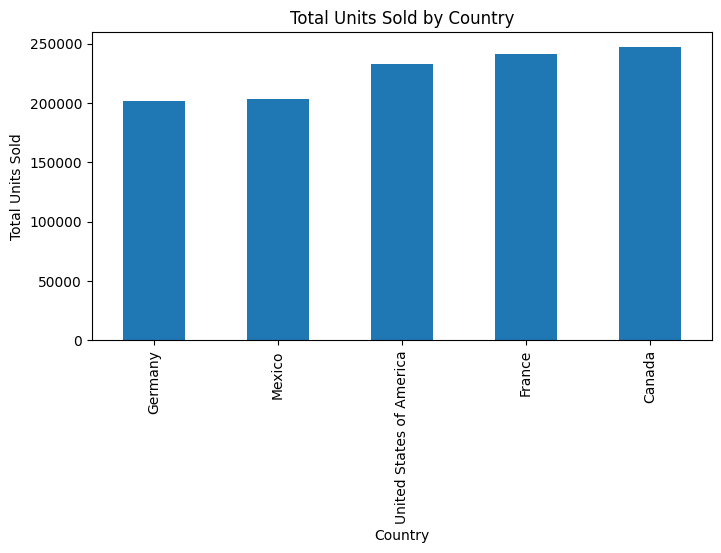

In [ ]:
#Total number of units sold per country
plt.figure(figsize=(8,4))
df.groupby('Country')['Units Sold'].sum().sort_values().plot(kind='bar')
plt.title("Total Units Sold by Country")
plt.ylabel("Total Units Sold")
plt.show()

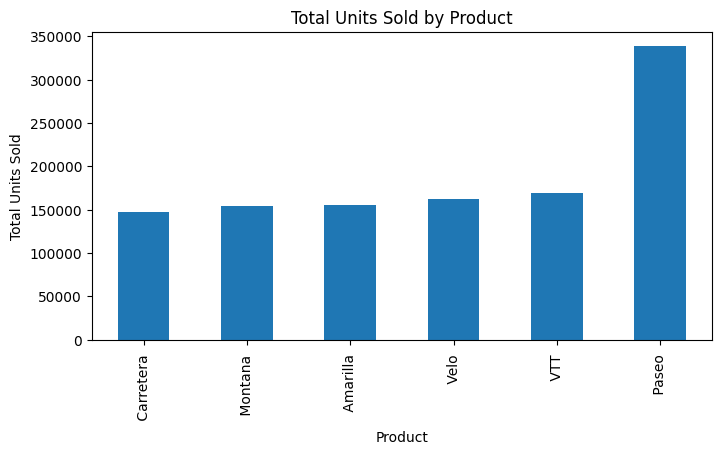

In [ ]:
#Total number of units sold per product
plt.figure(figsize=(8,4))
df.groupby('Product')['Units Sold'].sum().sort_values().plot(kind='bar')
plt.title("Total Units Sold by Product")
plt.ylabel("Total Units Sold")
plt.show()

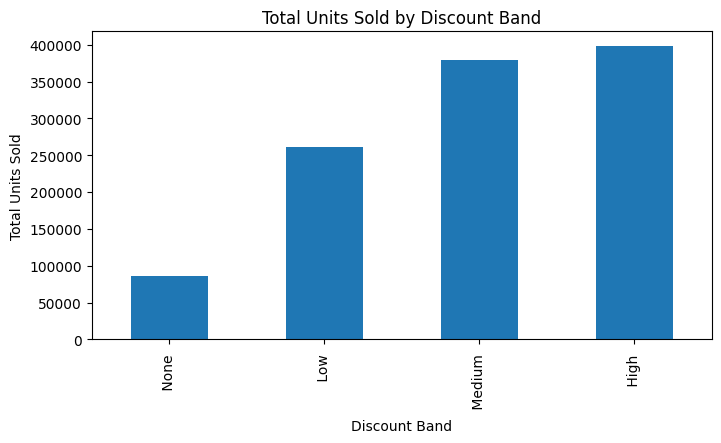

In [ ]:
#Total number of units sold per Discount Band
plt.figure(figsize=(8,4))
df.groupby('Discount Band')['Units Sold'].sum().sort_values().plot(kind='bar')
plt.title("Total Units Sold by Discount Band")
plt.ylabel("Total Units Sold")
plt.show()

In [ ]:
#Display Units Sold by Segment inside Each Country
df.groupby(['Country','Segment'])['Units Sold'].sum().unstack().fillna(0)

Segment                   Channel Partners  Enterprise  Government  Midmarket  \
Country                                                                         
Canada                               44061       34075       98412      37772   
France                               33503       33223      104725      42926   
Germany                              29689       34903       89080      21599   
Mexico                               21163       28638       91750      36059   
United States of America             32847       37715       86706      33822   

Segment                   Small Business  
Country                                   
Canada                             33107  
France                             26555  
Germany                            26223  
Mexico                             25715  
United States of America           41538

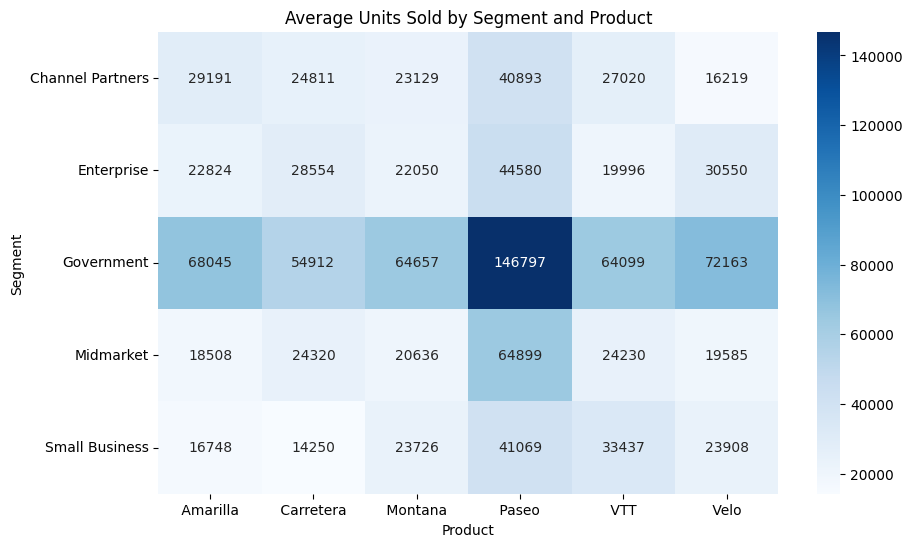

In [ ]:
#Display units sold by Segment and Product
pivot1 = df.pivot_table(index='Segment', columns='Product', values='Units Sold', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(pivot1, annot=True, fmt=".0f", cmap='Blues')
plt.title("Average Units Sold by Segment and Product")
plt.show()

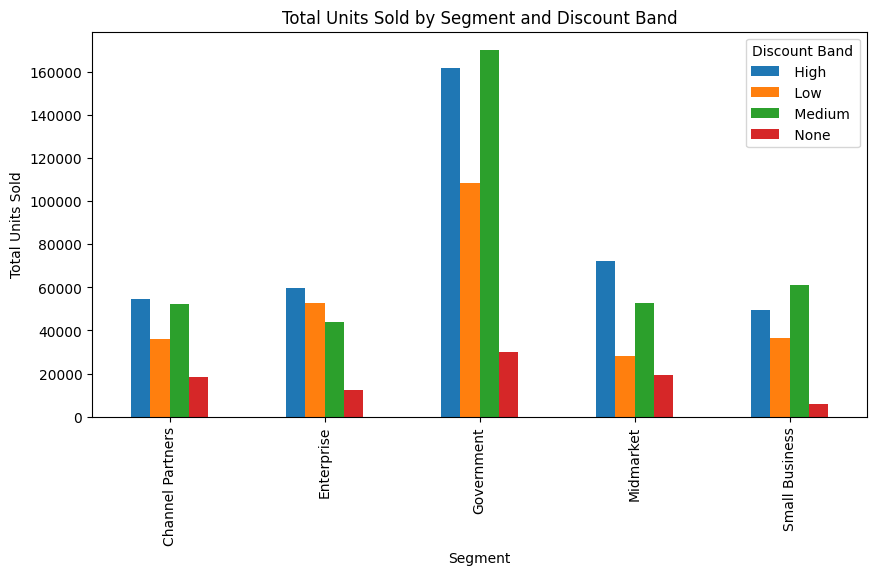

In [ ]:
#Display units sold by segment and Discount band
pivot2 = df.pivot_table(values='Units Sold',
                       index='Segment',
                       columns='Discount Band',
                       aggfunc='sum')

pivot2.plot(kind='bar', figsize=(10,5))
plt.title("Total Units Sold by Segment and Discount Band")
plt.ylabel("Total Units Sold")
plt.show()

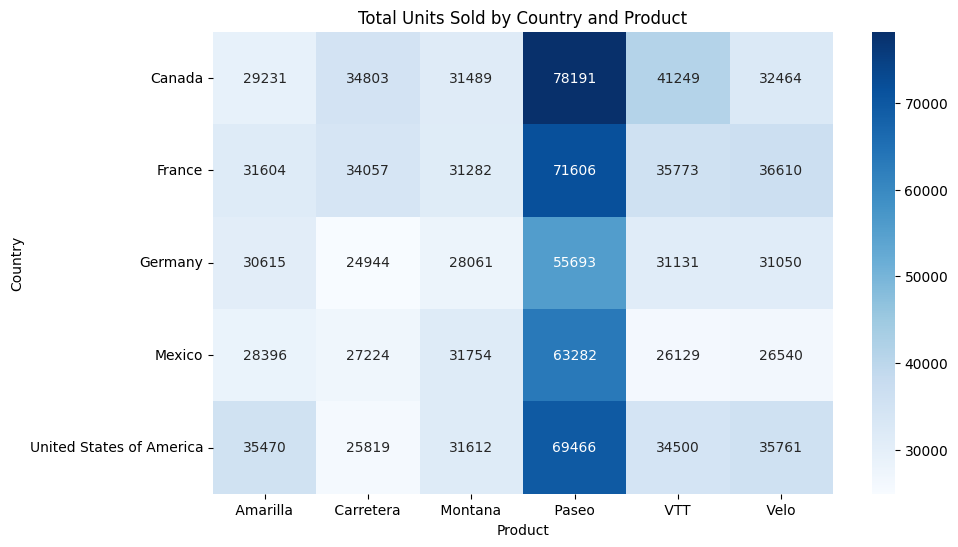

In [ ]:
#Display Units sold by country and Product
pivot3 = df.pivot_table(values='Units Sold',
                       index='Country',
                       columns='Product',
                       aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(pivot3, annot=True, cmap='Blues', fmt=".0f")
plt.title("Total Units Sold by Country and Product")
plt.show()

<Figure size 1200x600 with 0 Axes>

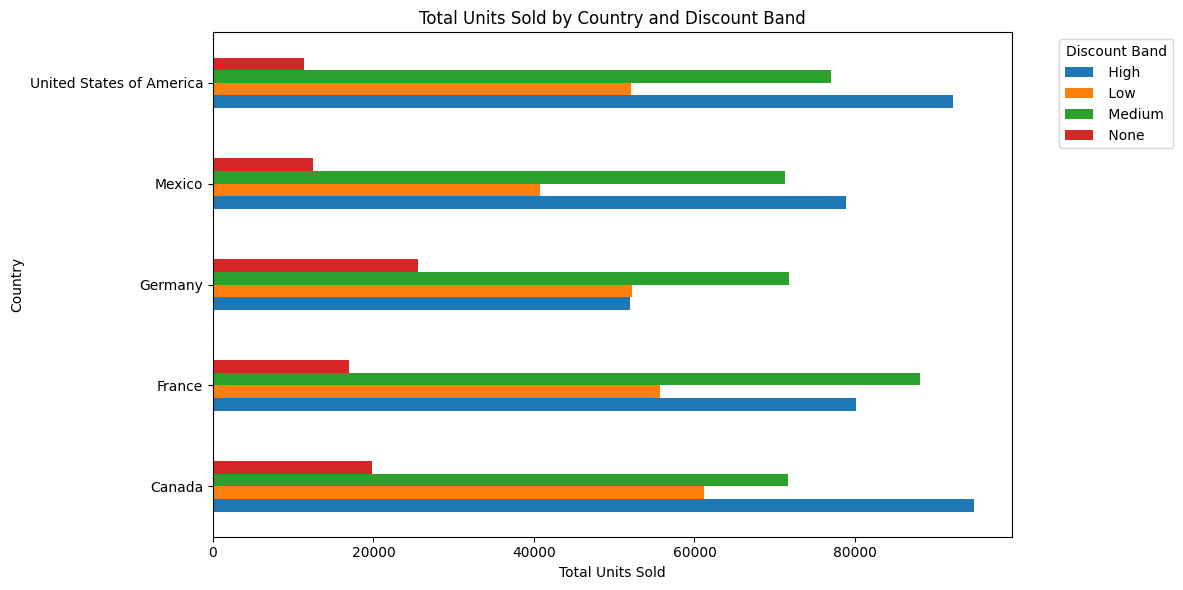

In [ ]:
#Display units sold by discount band for each country
pivot4 = df.groupby(['Country','Discount Band'])['Units Sold'].sum().unstack()

plt.figure(figsize=(12,6))
pivot4.plot(kind='barh', figsize=(12,6))

plt.title("Total Units Sold by Country and Discount Band")
plt.xlabel("Total Units Sold")
plt.ylabel("Country")
plt.legend(title="Discount Band", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

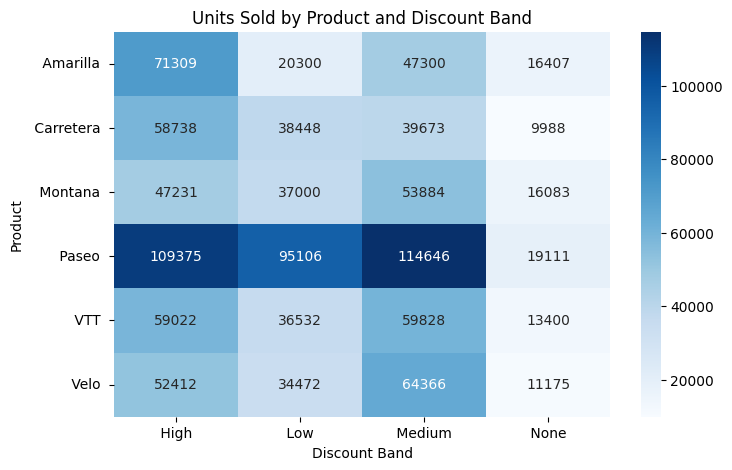

In [ ]:
#Display units sold for each Product with discount band
pivot5 = df.pivot_table(values='Units Sold',
                       index='Product',
                       columns='Discount Band',
                       aggfunc='sum')

plt.figure(figsize=(8,5))
sns.heatmap(pivot5, annot=True, fmt=".0f", cmap="Blues")
plt.title("Units Sold by Product and Discount Band")
plt.show()

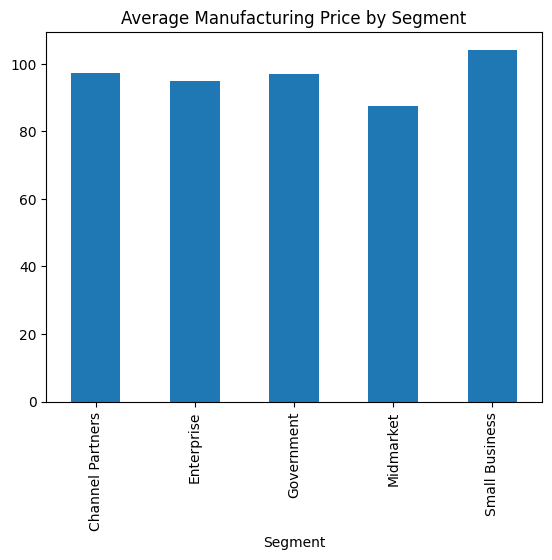

In [ ]:
#Display average manufacturing price per segment
df.groupby('Segment')['Manufacturing Price'].mean().plot(kind='bar')
plt.title("Average Manufacturing Price by Segment")
plt.show()

In [ ]:
#Display average of manufacturing price accross country
df.groupby('Country')['Manufacturing Price'].mean()

Country
Canada                       93.928571
France                       95.528571
Germany                      95.500000
Mexico                       95.671429
United States of America    101.757143
Name: Manufacturing Price, dtype: float64

<Axes: xlabel='Discount Band'>

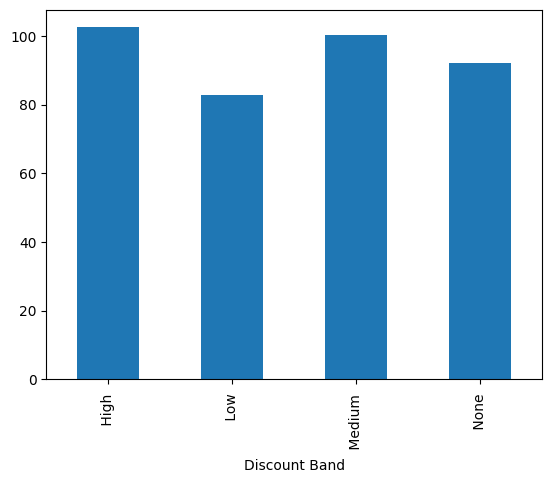

In [ ]:
#Average Manufacturing Cost by Discount Band
df.groupby('Discount Band')['Manufacturing Price'].mean().plot(kind='bar')

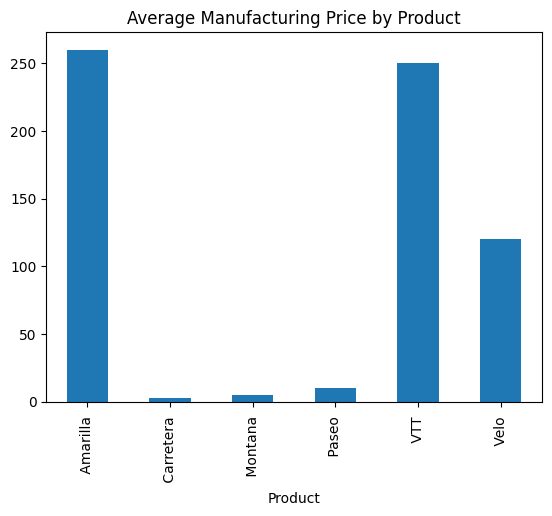

In [ ]:
#Display average manufacturing price per product
df.groupby('Product')['Manufacturing Price'].mean().plot(kind='bar')
plt.title("Average Manufacturing Price by Product")
plt.show()

In [ ]:
#Average Manufacturing Price by Country and Segment
pivot6 = df.pivot_table(values='Manufacturing Price',
                       index='Country',
                       columns='Segment',
                       aggfunc=['mean'])
pivot6

mean                                   \
Segment                  Channel Partners Enterprise  Government Midmarket   
Country                                                                      
Canada                              67.40     114.80   96.800000      68.1   
France                             104.95      73.25  102.216667      92.8   
Germany                            115.95      98.95   89.983333     103.8   
Mexico                              91.45      97.95   98.483333      79.3   
United States of America           105.95      90.30   98.150000      93.8   

                                         
Segment                  Small Business  
Country                                  
Canada                           116.80  
France                            91.05  
Germany                           79.85  
Mexico                           105.55  
United States of America         127.80

In [ ]:
#Average Manufacturing Price by Segment and Discount Band
pd.pivot_table(
    df,
    values='Manufacturing Price',
    index='Segment',
    columns='Discount Band',
    aggfunc='mean'
)

Discount Band          High        Low      Medium        None 
Segment                                                        
Channel Partners  126.828571  59.440000   91.300000  105.000000
Enterprise        120.757576  77.888889   83.440000  105.000000
Government         82.096154  99.736842  109.630252   93.450000
Midmarket         107.682927  63.611111   84.714286   63.384615
Small Business    116.781250  89.250000  100.675000  128.750000

In [ ]:
#Average Manufacturing Price by Country and Product
pd.pivot_table(df,
               values='Manufacturing Price',
               index='Country',
               columns='Product',
               aggfunc='mean').round(2)

Product                   Amarilla   Carretera   Montana   Paseo    VTT   \
Country                                                                    
Canada                        260.0         3.0       5.0    10.0  250.0   
France                        260.0         3.0       5.0    10.0  250.0   
Germany                       260.0         3.0       5.0    10.0  250.0   
Mexico                        260.0         3.0       5.0    10.0  250.0   
United States of America      260.0         3.0       5.0    10.0  250.0   

Product                   Velo   
Country                          
Canada                    120.0  
France                    120.0  
Germany                   120.0  
Mexico                    120.0  
United States of America  120.0

In [ ]:
#Average Manufacturing Price by Country and Discount Band
pd.pivot_table(df,
               values='Manufacturing Price',
               index='Country',
               columns='Discount Band',
               aggfunc='mean').round(2)

Discount Band              High     Low   Medium    None 
Country                                                  
Canada                    101.91   72.77   109.20   57.33
France                    107.58   69.74    90.24  156.44
Germany                    91.40   96.76    99.80   89.62
Mexico                     96.30  104.13   102.26   21.62
United States of America  114.18   71.47   102.30  148.12

In [ ]:
#Sales Efficiency by Country
df['Efficiency'] = df['Units Sold'] / df['Manufacturing Price']
df.groupby('Country')['Efficiency'].mean().sort_values(ascending=False)

Country
Canada                      187.613259
France                      180.993304
United States of America    160.341177
Mexico                      158.489748
Germany                     142.837076
Name: Efficiency, dtype: float64

Text(0.5, 1.0, 'Avg Manufacturing Price by Product & Discount Band')

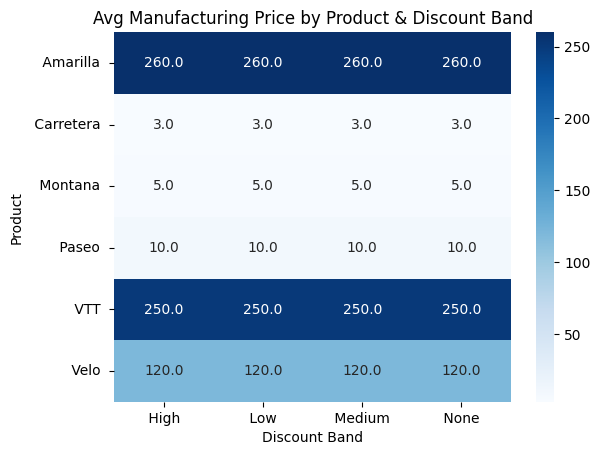

In [ ]:
#Average Manufacturing Price by Product and Discount Band
pivot7 = df.pivot_table(values='Manufacturing Price',
                       index='Product',
                       columns='Discount Band',
                       aggfunc='mean')

sns.heatmap(pivot7, annot=True, fmt=".1f", cmap='Blues')
plt.title("Avg Manufacturing Price by Product & Discount Band")

In [ ]:
#Average Manufacturing Price and Units Sold by Discount Band
pd.pivot_table(
    df,
    values=['Manufacturing Price', 'Units Sold'],
    index='Discount Band',
    aggfunc='mean'
)

Manufacturing Price   Units Sold
Discount Band                                  
High                    102.506122  1624.844898
Low                      82.887500  1636.612500
Medium                  100.289256  1568.995868
None                     92.226415  1625.735849

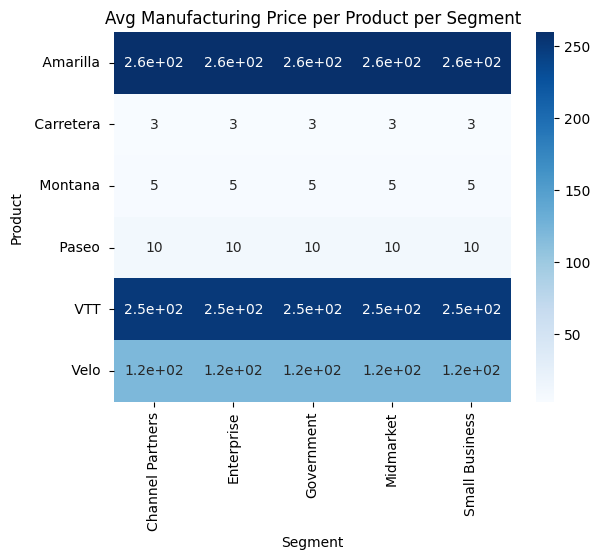

In [ ]:
#Display Average Manufacturing Price per Product per Segment
pivot8 = df.pivot_table(values='Manufacturing Price',
                       index='Product',
                       columns='Segment',
                       aggfunc='mean')
sns.heatmap(pivot8, annot=True, cmap='Blues')
plt.title("Avg Manufacturing Price per Product per Segment")
plt.show()

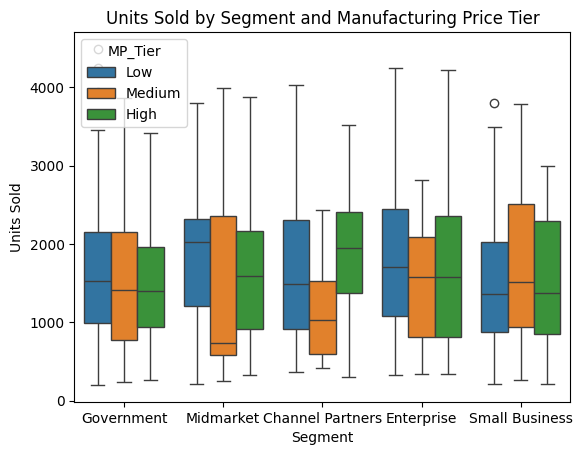

In [ ]:
#Display Units Sold by Segment and Manufacturing Price Tier
df['MP_Tier'] = pd.cut(
    df['Manufacturing Price'],
    bins=[0, 20, 150, 300],
    labels=['Low', 'Medium', 'High']
)

sns.boxplot(data=df, x='Segment', y='Units Sold', hue='MP_Tier')
plt.title("Units Sold by Segment and Manufacturing Price Tier")
plt.show()

In [ ]:
#Display top selling products overall
df.groupby('Product')[['Units Sold','Manufacturing Price']].mean().sort_values('Units Sold', ascending=False)

Units Sold  Manufacturing Price
Product                                     
Paseo       1674.445545                 10.0
Montana     1658.043011                  5.0
Amarilla    1652.297872                260.0
Carretera   1579.000000                  3.0
VTT         1548.458716                250.0
Velo        1490.137615                120.0

<Axes: ylabel='Product'>

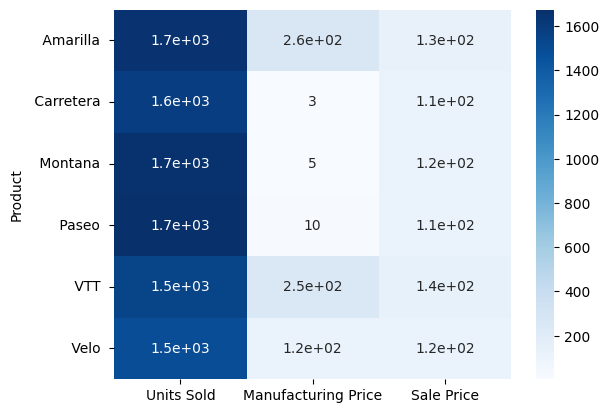

In [ ]:
# Which products have high average demand per transaction.
sns.heatmap(df.groupby('Product')[['Units Sold','Manufacturing Price','Sale Price']].mean(), annot=True, cmap='Blues')

In [ ]:
#Display sale price by segment
df.groupby('Segment')['Sale Price'].mean().sort_values()

Segment
Channel Partners     12.000000
Midmarket            15.000000
Enterprise          125.000000
Government          125.666667
Small Business      300.000000
Name: Sale Price, dtype: float64

In [ ]:
#Sale Price Variation (Std Dev) per Segment
df.groupby('Segment')['Sale Price'].std().sort_values()

Segment
Channel Partners      0.000000
Enterprise            0.000000
Midmarket             0.000000
Small Business        0.000000
Government          158.981569
Name: Sale Price, dtype: float64

In [ ]:
#Mean sale price per country
df.groupby('Country')['Sale Price'].mean().sort_values()

Country
Canada                      118.428571
France                      118.428571
Germany                     118.428571
Mexico                      118.428571
United States of America    118.428571
Name: Sale Price, dtype: float64

In [ ]:
#Sale Price Variability Across Countries
df.groupby('Country')['Sale Price'].std().sort_values()

Country
Canada                      137.168548
France                      137.168548
Germany                     137.168548
United States of America    137.168548
Mexico                      137.168548
Name: Sale Price, dtype: float64

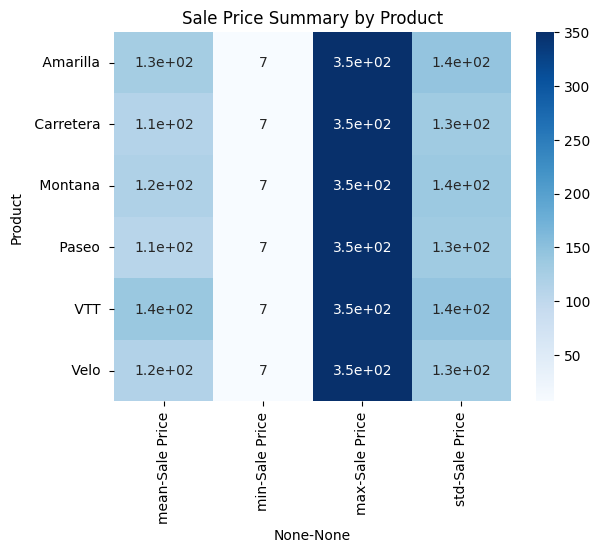

In [ ]:
# Sale Price Summary by Product
pivot9 = df.pivot_table(values='Sale Price', index='Product', aggfunc=['mean','min','max','std'])
sns.heatmap(pivot9, annot=True, cmap='Blues')
plt.title("Sale Price Summary by Product")
plt.show()

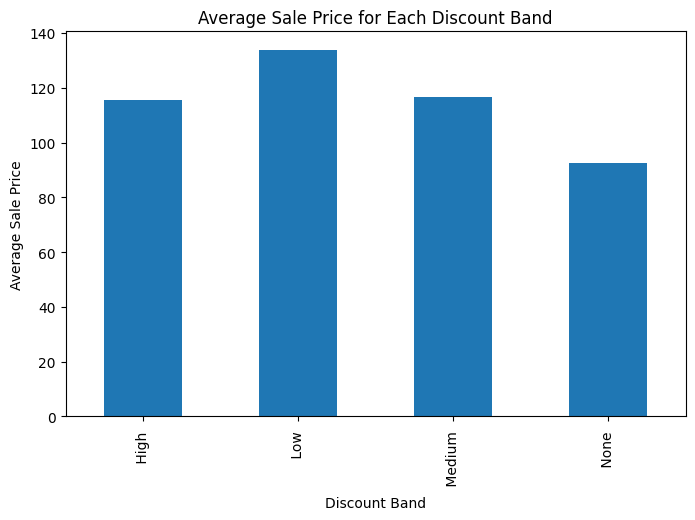

In [ ]:
#Display average sale price per discount Band
df.groupby('Discount Band')['Sale Price'].mean().plot(kind='bar', figsize=(8,5))
plt.title("Average Sale Price for Each Discount Band")
plt.ylabel("Average Sale Price")
plt.show()

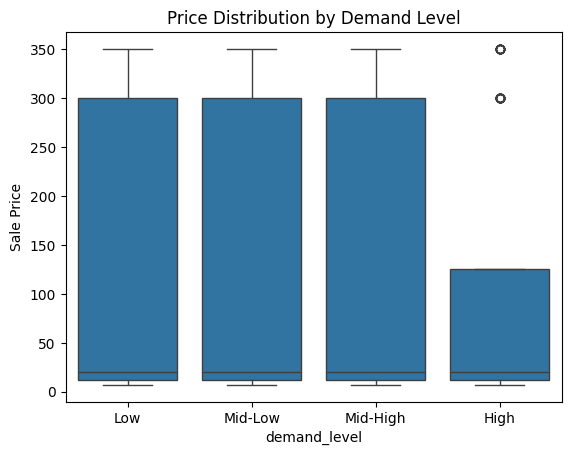

In [ ]:
#Which demand levels corresponds to higher pricing?
df['demand_level'] = pd.qcut(df['Units Sold'], 4, labels=['Low','Mid-Low','Mid-High','High'])
sns.boxplot(data=df, x='demand_level', y='Sale Price')
plt.title("Price Distribution by Demand Level")
plt.show()

<Axes: xlabel='Margin_Per_Unit', ylabel='Count'>

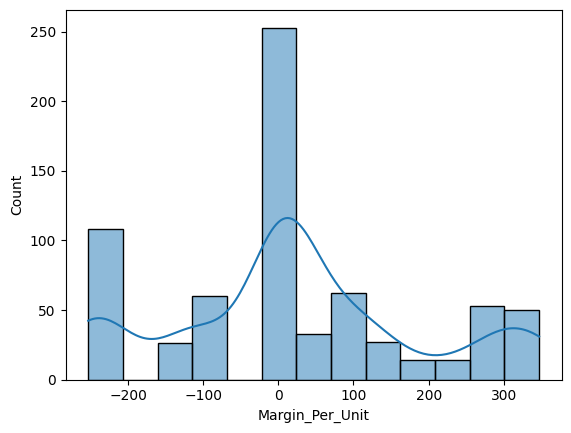

In [ ]:
#Margin distribution
df['Margin_Per_Unit'] = df['Sale Price'] - df['Manufacturing Price']
sns.histplot(df['Margin_Per_Unit'], kde=True)

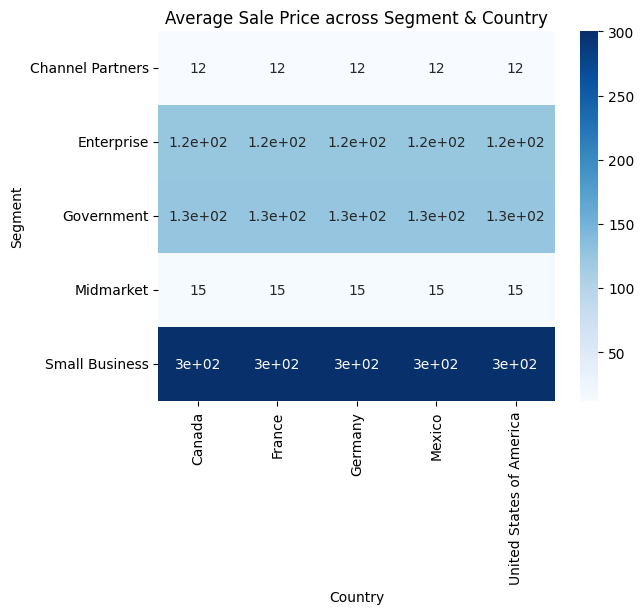

In [ ]:
#Mean sale price by country and segment
pivot10 = df.pivot_table(values='Sale Price', index='Segment', columns='Country', aggfunc='mean')
sns.heatmap(pivot10, annot=True, cmap='Blues')
plt.title("Average Sale Price across Segment & Country")
plt.show()

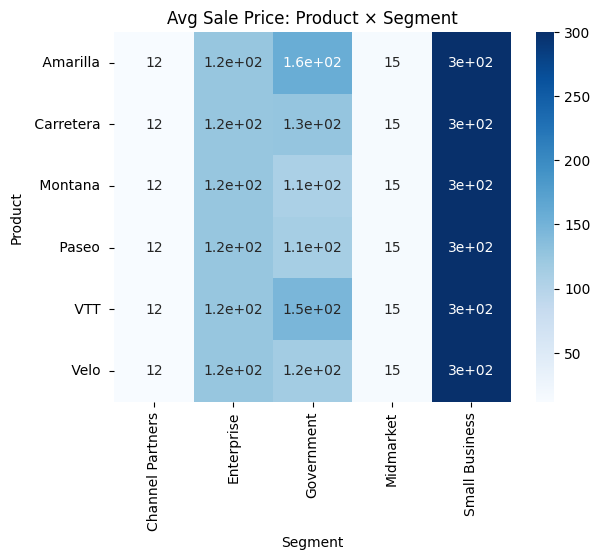

In [ ]:
#Reveal pricing strategy patterns across market categories
pivot11 = df.pivot_table(values='Sale Price', index='Product', columns='Segment', aggfunc='mean')
sns.heatmap(pivot11, annot=True, cmap='Blues')
plt.title("Avg Sale Price: Product × Segment")
plt.show()

In [ ]:
#Segment-Wise Mean Comparison Table
df.groupby('Segment')[['Sale Price','Manufacturing Price','Units Sold']].mean()

Sale Price  Manufacturing Price  Units Sold
Segment                                                      
Channel Partners   12.000000            97.140000     1612.63
Enterprise        125.000000            95.050000     1685.54
Government        125.666667            97.126667     1568.91
Midmarket          15.000000            87.560000     1721.78
Small Business    300.000000           104.210000     1531.38

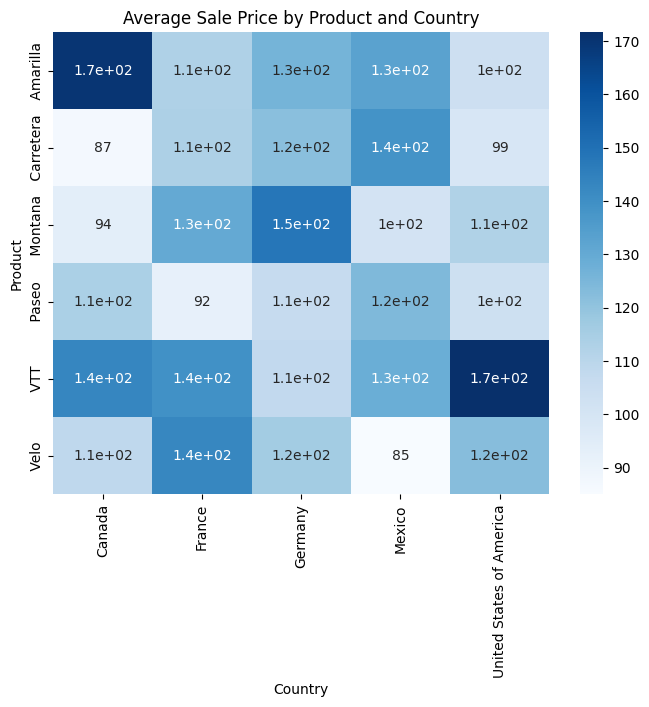

In [ ]:
#Mean sale price by product and country
pivot12 = df.pivot_table(values='Sale Price', index='Product', columns='Country', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(pivot12, annot=True, cmap='Blues')
plt.title("Average Sale Price by Product and Country")
plt.show()

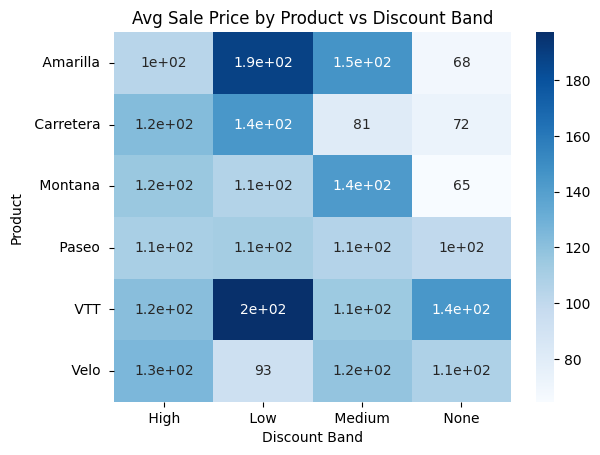

In [ ]:
#Average sales price by product and discount Band
pivot13 = df.pivot_table(values='Sale Price', index='Product', columns='Discount Band', aggfunc='mean')
sns.heatmap(pivot13, annot=True, cmap='Blues')
plt.title("Avg Sale Price by Product vs Discount Band")
plt.show()

In [ ]:
#Price Elasticity by Product Category
df.groupby('Product')[['Sale Price','Units Sold']].corr().iloc[0::2,-1]

Product               
Amarilla    Sale Price   -0.083079
Carretera   Sale Price   -0.138458
Montana     Sale Price   -0.149370
Paseo       Sale Price   -0.041539
VTT         Sale Price   -0.106167
Velo        Sale Price    0.084580
Name: Units Sold, dtype: float64

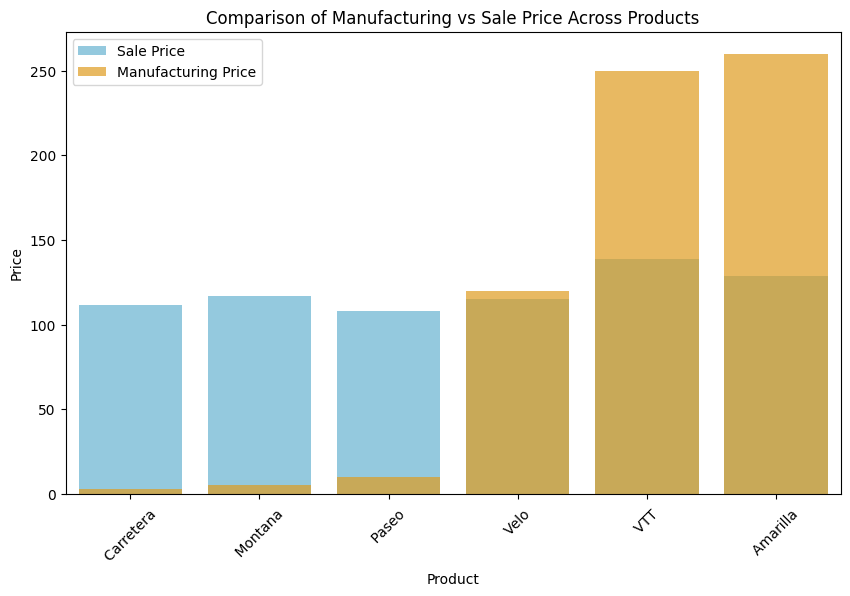

In [ ]:
#Comparison of Manufacturing vs Sale Price Across Products
plt.figure(figsize=(10,6))

sns.barplot(data=df, x='Product', y='Sale Price', errorbar=None,
            color='skyblue', label='Sale Price')

sns.barplot(data=df, x='Product', y='Manufacturing Price', errorbar=None,
            color='orange', alpha=0.7, label='Manufacturing Price')

plt.legend()
plt.title("Comparison of Manufacturing vs Sale Price Across Products")
plt.xlabel("Product")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Profit Margin
df['Margin_%'] = (df['Sale Price'] - df['Manufacturing Price']) / df['Sale Price'] * 100
df.groupby('Country')[['Units Sold', 'Manufacturing Price','Margin_%']].mean()

Units Sold  Manufacturing Price    Margin_%
Country                                                               
Canada                    1767.335714            93.928571 -295.728163
France                    1720.942857            95.528571 -382.755102
Germany                   1439.242857            95.500000 -397.689524
Mexico                    1452.321429            95.671429 -386.648027
United States of America  1661.628571           101.757143 -353.198571

In [ ]:
#Average sale price by segment and discount Band
pd.pivot_table(
    df,
    values='Sale Price',
    index='Segment',
    columns='Discount Band',
    aggfunc='mean'
)

Discount Band          High         Low      Medium   None 
Segment                                                    
Channel Partners   12.000000   12.000000   12.000000   12.0
Enterprise        125.000000  125.000000  125.000000  125.0
Government        130.355769  160.631579  103.823529  131.6
Midmarket          15.000000   15.000000   15.000000   15.0
Small Business    300.000000  300.000000  300.000000  300.0

In [ ]:
#Average and sum of sales price and units sold per segment
pd.pivot_table(
    df,
    values=['Sale Price', 'Units Sold'],
    index='Segment',
    aggfunc=['mean', 'sum']
)

mean                   sum           
                  Sale Price Units Sold Sale Price Units Sold
Segment                                                      
Channel Partners   12.000000    1612.63     1200.0     161263
Enterprise        125.000000    1685.54    12500.0     168554
Government        125.666667    1568.91    37700.0     470673
Midmarket          15.000000    1721.78     1500.0     172178
Small Business    300.000000    1531.38    30000.0     153138

In [ ]:
#Average Sale Price and Manufacturing Price by Segment
pd.pivot_table(
    df,
    values=['Sale Price', 'Manufacturing Price'],
    index='Segment',
    aggfunc='mean'
)

Manufacturing Price  Sale Price
Segment                                          
Channel Partners            97.140000   12.000000
Enterprise                  95.050000  125.000000
Government                  97.126667  125.666667
Midmarket                   87.560000   15.000000
Small Business             104.210000  300.000000

In [ ]:
#Average Sale Price by Country and Discount Band
pd.pivot_table(
    df,
    values='Sale Price',
    index='Country',
    columns='Discount Band',
    aggfunc='mean'
)

Discount Band                  High         Low      Medium        None 
Country                                                                 
Canada                    129.849057  109.354839  117.363636   95.333333
France                     99.488889   99.967742  141.709091  134.444444
Germany                    99.200000  191.617647   88.660000  104.000000
Mexico                    111.875000  142.733333  116.500000   84.250000
United States of America  131.862745  121.764706  117.234043   25.625000

In [ ]:
# Average Sale Price and Units Sold by Discount Band
pd.pivot_table(
    df,
    values=['Sale Price', 'Units Sold'],
    index='Discount Band',
    aggfunc='mean'
)

Sale Price   Units Sold
Discount Band                         
High           115.579592  1624.844898
Low            133.912500  1636.612500
Medium         116.776860  1568.995868
None            92.396226  1625.735849

In [ ]:
#Average Sale Price and Manufacturing Price by Discount Band
pd.pivot_table(
    df,
    values=['Sale Price', 'Manufacturing Price'],
    index='Discount Band',
    aggfunc='mean'
)

Manufacturing Price  Sale Price
Discount Band                                 
High                    102.506122  115.579592
Low                      82.887500  133.912500
Medium                  100.289256  116.776860
None                     92.226415   92.396226

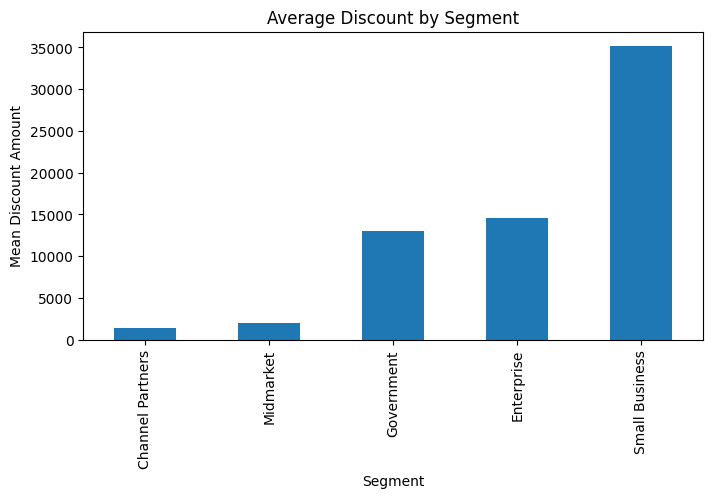

In [ ]:
#Average discounts per segment
df.groupby('Segment')['Discounts'].mean().sort_values().plot(kind='bar', figsize=(8,4))
plt.title("Average Discount by Segment")
plt.ylabel("Mean Discount Amount")
plt.show()

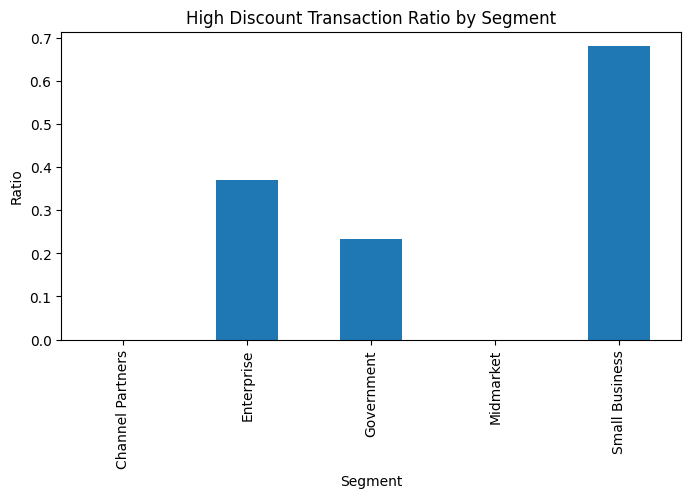

In [ ]:
#Percentage of High-Discount Transactions by Segment
threshold = df['Discounts'].quantile(0.75)
high_disc_df = df[df['Discounts'] > threshold]

high_disc_ratio = high_disc_df.groupby('Segment').size() / df.groupby('Segment').size()
high_disc_ratio.plot(kind='bar', figsize=(8,4), title="High Discount Transaction Ratio by Segment")
plt.ylabel("Ratio")
plt.show()

In [ ]:
#Identify % of Transactions With No Discount
df['Discount_Flag'] = df['Discounts'] > 0
df.groupby('Country')['Discount_Flag'].mean().sort_values(ascending=False)

Country
United States of America    0.942857
Mexico                      0.942857
France                      0.935714
Canada                      0.914286
Germany                     0.885714
Name: Discount_Flag, dtype: float64

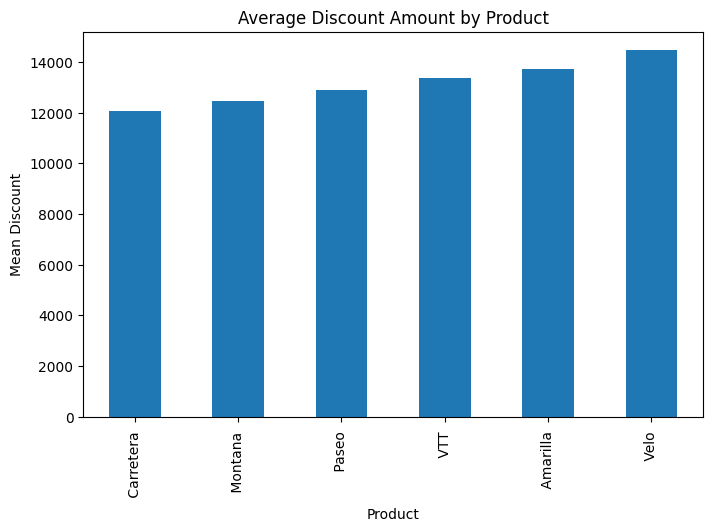

In [ ]:
#Average discount offered per product
df.groupby('Product')['Discounts'].mean().sort_values().plot(kind='bar', figsize=(8,5))
plt.title("Average Discount Amount by Product")
plt.ylabel("Mean Discount")
plt.show()

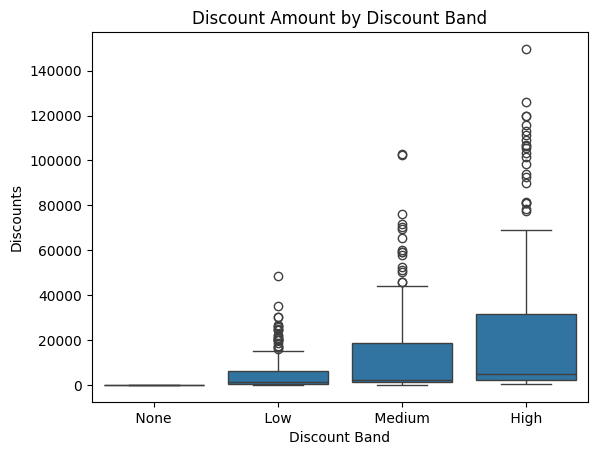

In [ ]:
#Discounts Across Discount Bands
sns.boxplot(data=df, x='Discount Band', y='Discounts')
plt.title("Discount Amount by Discount Band")
plt.show()

<Axes: xlabel='Country', ylabel='Segment'>

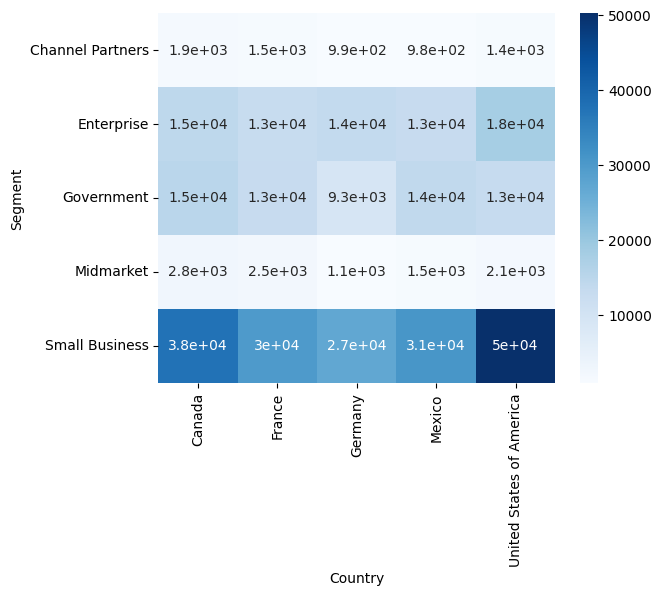

In [ ]:
#Average Discount by Segment and Country
pivot14 = df.pivot_table(values='Discounts', index='Segment', columns='Country', aggfunc='mean')
sns.heatmap(pivot14, annot=True, cmap='Blues')

<Axes: xlabel='Product', ylabel='Segment'>

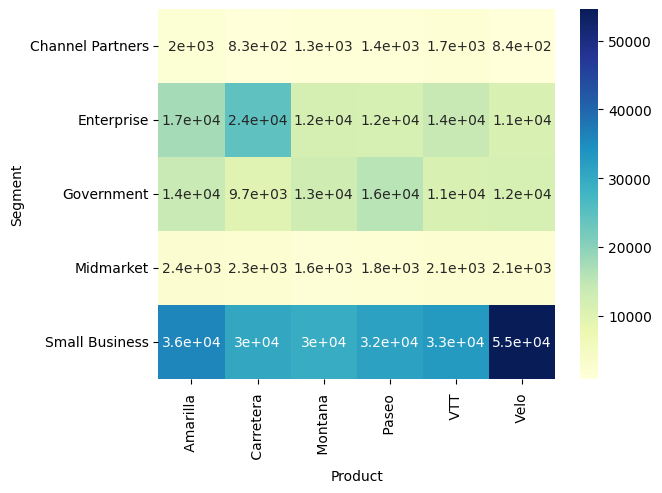

In [ ]:
#Average Discount by Segment and Product
pivot15 = df.pivot_table(values='Discounts', index='Segment', columns='Product', aggfunc='mean')
sns.heatmap(pivot15, annot=True, cmap='YlGnBu')

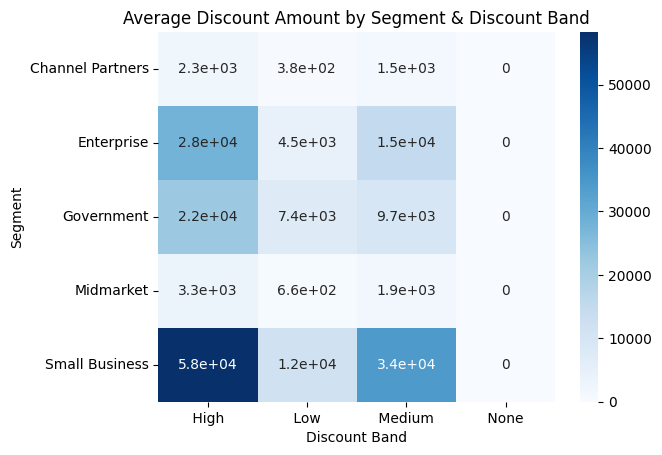

In [ ]:
#Average Discount by Segment and Discount Band
pivot16 = df.pivot_table(values='Discounts', index='Segment', columns='Discount Band', aggfunc='mean')
sns.heatmap(pivot16, annot=True, cmap='Blues')
plt.title("Average Discount Amount by Segment & Discount Band")
plt.show()

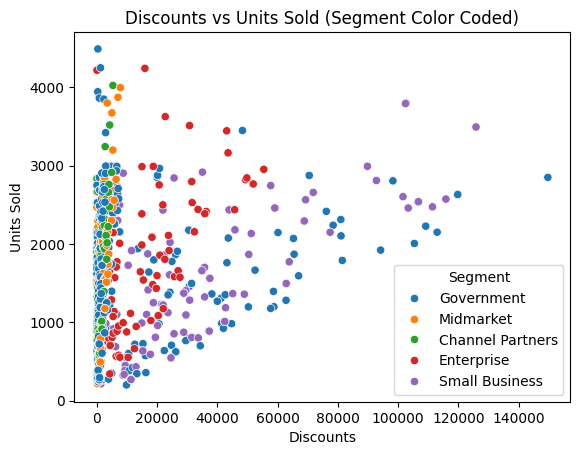

In [ ]:
#Demand sensitivity
sns.scatterplot(data=df, x='Discounts', y='Units Sold', hue='Segment')
plt.title("Discounts vs Units Sold (Segment Color Coded)")
plt.show()

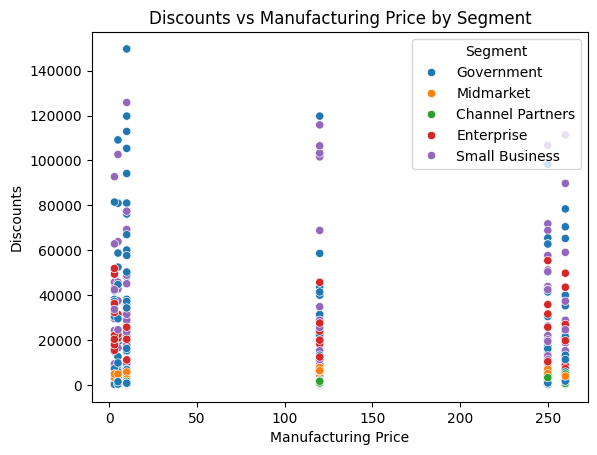

In [ ]:
#Discounts vs Manufacturing Price by Segment
sns.scatterplot(data=df, x='Manufacturing Price', y='Discounts', hue='Segment')
plt.title("Discounts vs Manufacturing Price by Segment")
plt.show()

In [ ]:
#Discounts and Units Sold Summary by Country
df.groupby('Country')[['Discounts', 'Units Sold']].agg(['mean','median','min','max','std'])

Discounts                                         \
                                  mean    median  min       max           std   
Country                                                                         
Canada                    14603.633000  3149.575  0.0  119756.0  24855.877789   
France                    12339.301643  2766.400  0.0  111375.0  19951.393009   
Germany                   10115.190571  1863.050  0.0  106512.0  18009.638804   
Mexico                    12697.020643  2753.345  0.0  149677.5  23407.504929   
United States of America  15996.627429  2663.000  0.0  125820.0  27259.650881   

                           Units Sold                                 
                                 mean  median  min   max         std  
Country                                                               
Canada                    1767.335714  1743.0  200  4251  873.557628  
France                    1720.942857  1736.0  293  4244  839.418330  
Germany                   1439.242857  1335.5  214  4220  827.882050  
Mexico                    1452.321429  1371.5  245  2993  777.702180  
United States of America  1661.628571  1489.5  263  4492  965.145811

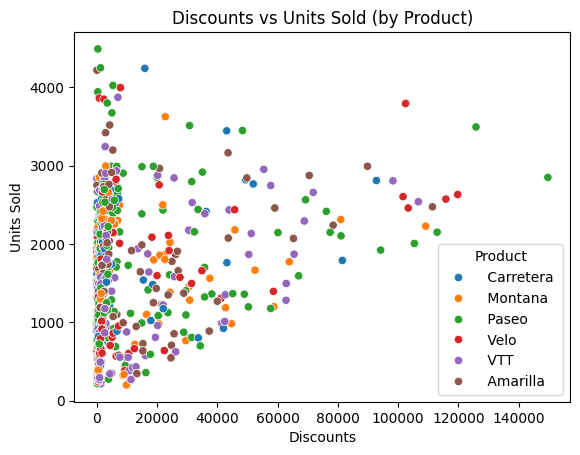

In [ ]:
#Relationship Between Discounts and Units Sold by Product
sns.scatterplot(data=df, x='Discounts', y='Units Sold', hue='Product')
plt.title("Discounts vs Units Sold (by Product)")
plt.show()

In [ ]:
#Average Discount by Country and Product
pd.pivot_table(
    df,
    values='Discounts',
    index='Country',
    columns='Product',
    aggfunc='mean'
)

Product                      Amarilla     Carretera       Montana   \
Country                                                              
Canada                    17162.090556  10782.458000  15010.859444   
France                    16790.937222  14694.867222  15791.681500   
Germany                    9053.013333  12201.766000  12906.146111   
Mexico                    11282.030500  12911.643333   5562.284500   
United States of America  14520.704500   9741.820588  13496.894118   

Product                         Paseo           VTT          Velo   
Country                                                             
Canada                    13359.309762  16261.758636  16544.833000  
France                     9675.398500   8707.723182  12106.285000  
Germany                    8150.581500   9354.874091  11136.181818  
Mexico                    20111.865250   7208.864500  11801.595909  
United States of America  13047.831000  24230.406957  20645.347826

In [ ]:
#Discounts & Manufacturing Price by Country
pd.pivot_table(
    df,
    values=['Discounts','Manufacturing Price'],
    index='Country',
    aggfunc='mean'
)

Discounts  Manufacturing Price
Country                                                    
Canada                    14603.633000            93.928571
France                    12339.301643            95.528571
Germany                   10115.190571            95.500000
Mexico                    12697.020643            95.671429
United States of America  15996.627429           101.757143

In [ ]:
#Discounts & Manufacturing Price by Product
pd.pivot_table(
    df,
    values=['Discounts','Manufacturing Price'],
    index='Product',
    aggfunc='mean'
)

Discounts  Manufacturing Price
Product                                      
Amarilla    13725.142979                260.0
Carretera   12066.802366                  3.0
Montana     12462.716344                  5.0
Paseo       12873.851782                 10.0
VTT         13363.417248                250.0
Velo        14465.220550                120.0

<Axes: xlabel='Discounts', ylabel='Units Sold'>

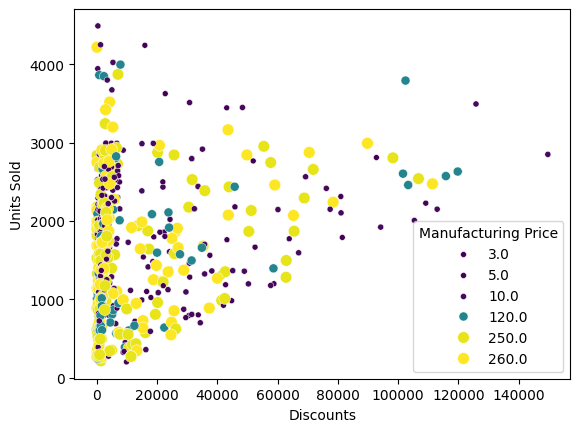

In [ ]:
#Discounts vs Units Sold vs Manufacturing Cost
sns.scatterplot(
    data=df,
    x='Discounts',
    y='Units Sold',
    size='Manufacturing Price',
    hue='Manufacturing Price',
    palette='viridis',
    legend=True
)

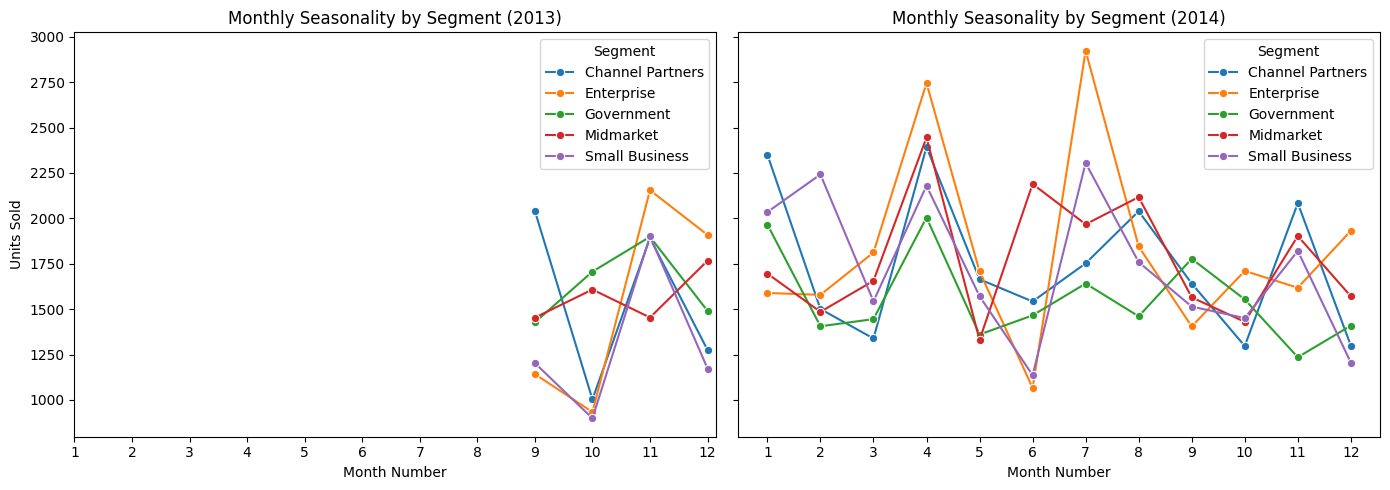

In [ ]:
#Monthly Seasonality Pattern by Segment (Units Sold)
df_month_year_seg = df.groupby(['Year','Month Number','Segment'])['Units Sold'].mean().reset_index()

df_2013 = df_month_year_seg[df_month_year_seg['Year'] == 2013]
df_2014 = df_month_year_seg[df_month_year_seg['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

sns.lineplot(data=df_2013, x='Month Number', y='Units Sold', hue='Segment', marker='o', ax=axes[0])
axes[0].set_title("Monthly Seasonality by Segment (2013)")
axes[0].set_xticks(range(1,13))

sns.lineplot(data=df_2014, x='Month Number', y='Units Sold', hue='Segment', marker='o', ax=axes[1])
axes[1].set_title("Monthly Seasonality by Segment (2014)")
axes[1].set_xticks(range(1,13))

plt.tight_layout()
plt.show()

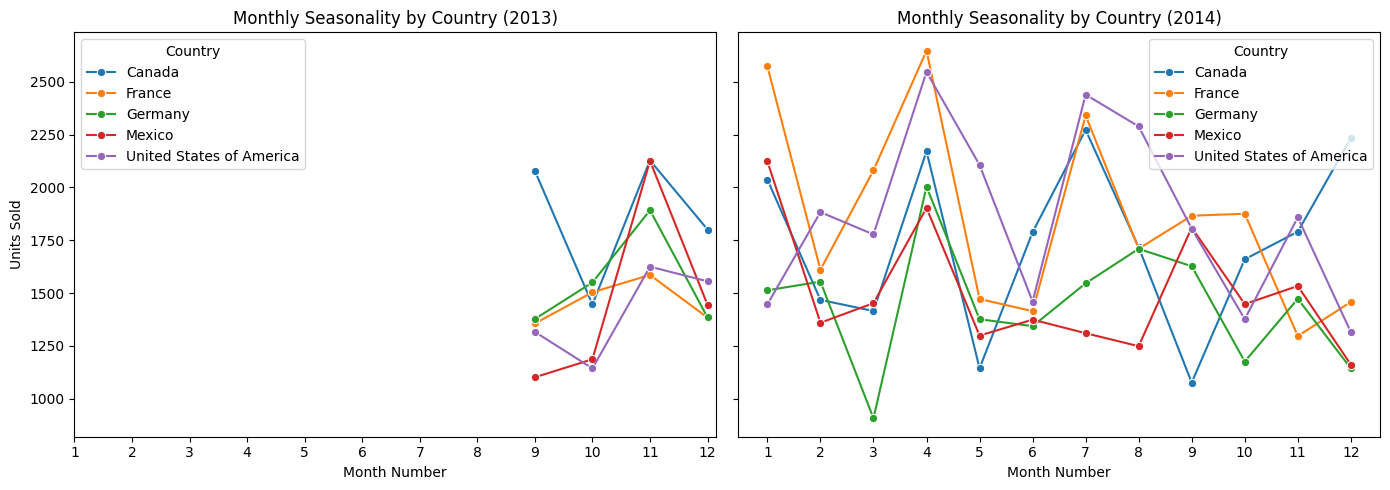

In [ ]:
#Monthly Seasonality Pattern by Country (Units Sold)
df_month_year_country = df.groupby(['Year','Month Number','Country'])['Units Sold'].mean().reset_index()

df_2013_c = df_month_year_country[df_month_year_country['Year'] == 2013]
df_2014_c = df_month_year_country[df_month_year_country['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

sns.lineplot(data=df_2013_c, x='Month Number', y='Units Sold',
             hue='Country', marker='o', ax=axes[0])
axes[0].set_title("Monthly Seasonality by Country (2013)")
axes[0].set_xticks(range(1,13))

sns.lineplot(data=df_2014_c, x='Month Number', y='Units Sold',
             hue='Country', marker='o', ax=axes[1])
axes[1].set_title("Monthly Seasonality by Country (2014)")
axes[1].set_xticks(range(1,13))

plt.tight_layout()
plt.show()

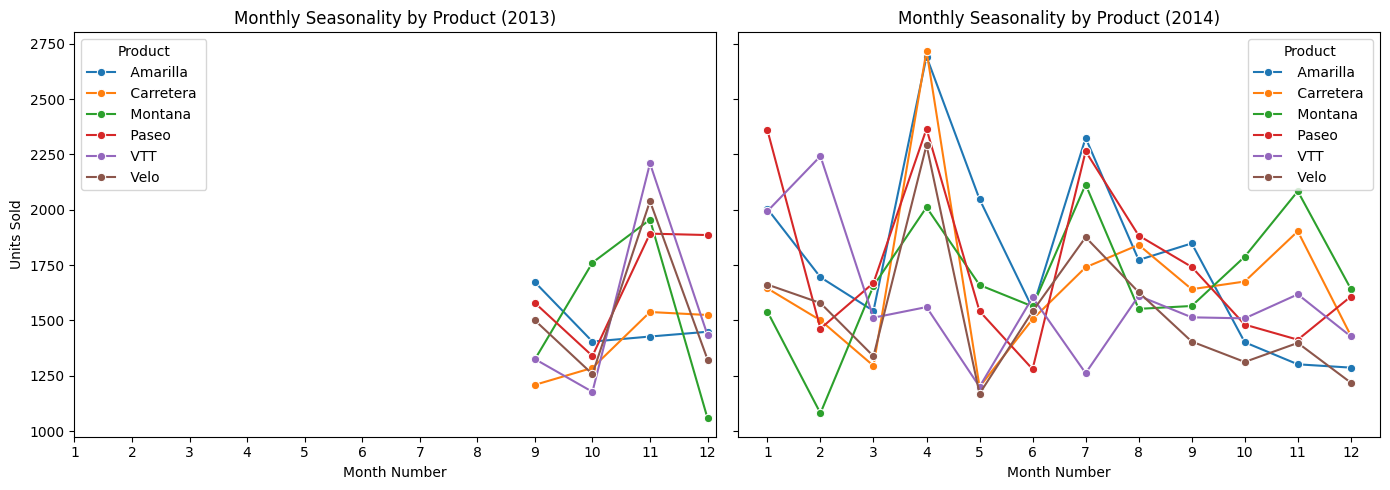

In [ ]:
#Monthly Seasonality Pattern by Product (Units Sold)
df_month_year_product = df.groupby(['Year','Month Number','Product'])['Units Sold'].mean().reset_index()

df_2013_p = df_month_year_product[df_month_year_product['Year'] == 2013]
df_2014_p = df_month_year_product[df_month_year_product['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

sns.lineplot(data=df_2013_p, x='Month Number', y='Units Sold',
             hue='Product', marker='o', ax=axes[0])
axes[0].set_title("Monthly Seasonality by Product (2013)")
axes[0].set_xticks(range(1,13))

sns.lineplot(data=df_2014_p, x='Month Number', y='Units Sold',
             hue='Product', marker='o', ax=axes[1])
axes[1].set_title("Monthly Seasonality by Product (2014)")
axes[1].set_xticks(range(1,13))

plt.tight_layout()
plt.show()

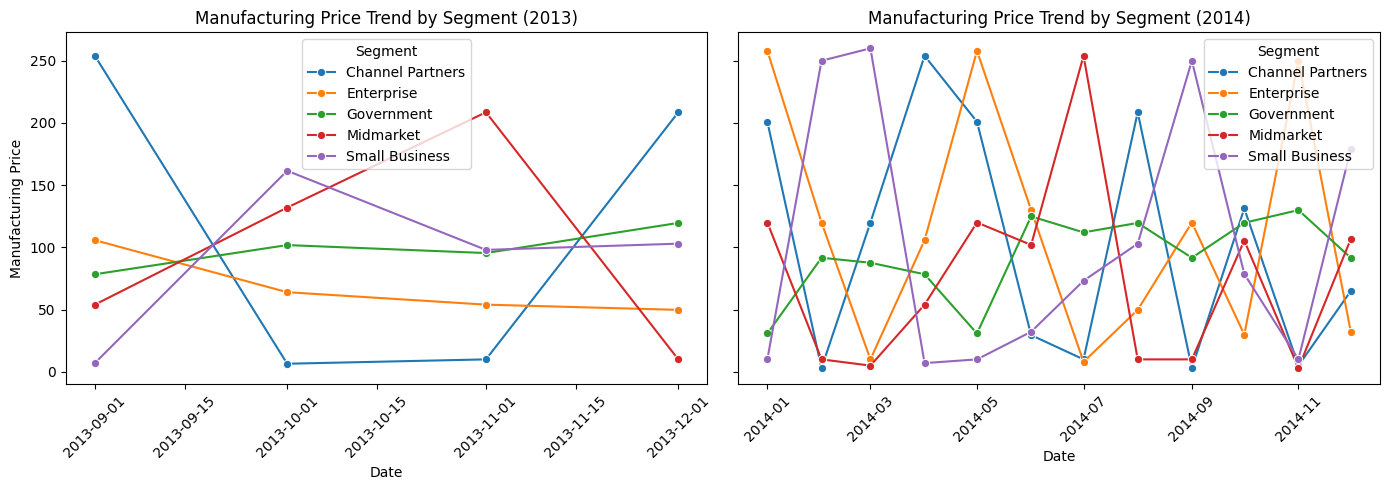

In [ ]:
#Monthly Seasonality Pattern by Segment (Manufacturing Price)
df_seg = df.groupby(['Year','Date','Segment'])['Manufacturing Price'].mean().reset_index()

df_2013_seg = df_seg[df_seg['Year']==2013]
df_2014_seg = df_seg[df_seg['Year']==2014]

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

sns.lineplot(data=df_2013_seg, x='Date', y='Manufacturing Price', hue='Segment', marker='o', ax=axes[0])
axes[0].set_title("Manufacturing Price Trend by Segment (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_seg, x='Date', y='Manufacturing Price', hue='Segment', marker='o', ax=axes[1])
axes[1].set_title("Manufacturing Price Trend by Segment (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

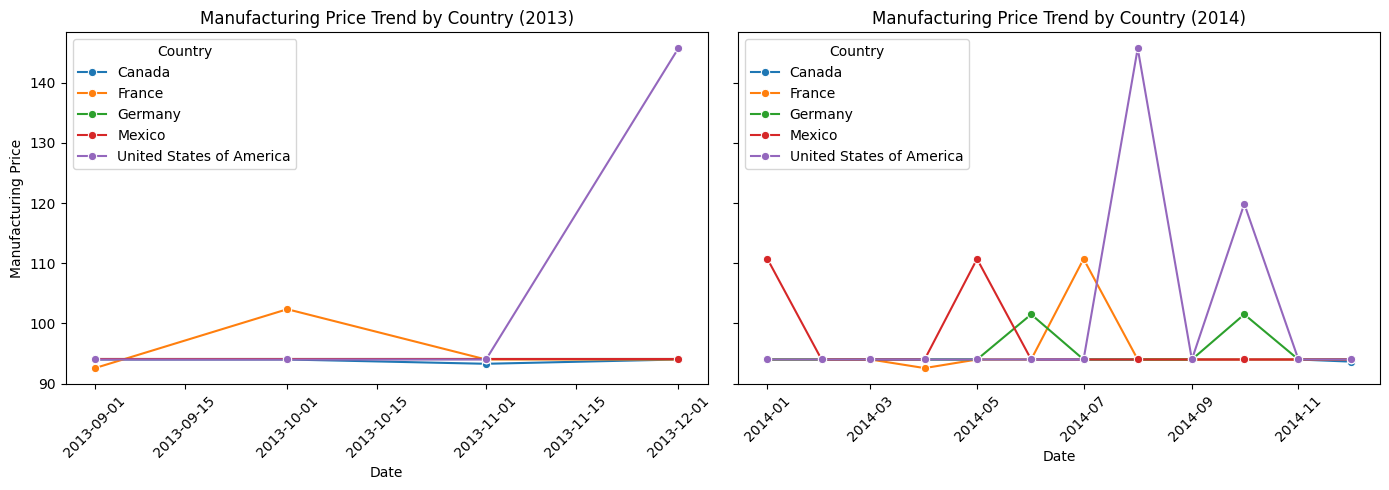

In [ ]:
#Monthly Seasonality Pattern by Country (Manufacturing Price)
df_country = df.groupby(['Year','Date','Country'])['Manufacturing Price'].mean().reset_index()

df_2013_country = df_country[df_country['Year']==2013]
df_2014_country = df_country[df_country['Year']==2014]

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

# 2013
sns.lineplot(data=df_2013_country, x='Date', y='Manufacturing Price', hue='Country', marker='o', ax=axes[0])
axes[0].set_title("Manufacturing Price Trend by Country (2013)")
axes[0].tick_params(axis='x', rotation=45)

# 2014
sns.lineplot(data=df_2014_country, x='Date', y='Manufacturing Price', hue='Country', marker='o', ax=axes[1])
axes[1].set_title("Manufacturing Price Trend by Country (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

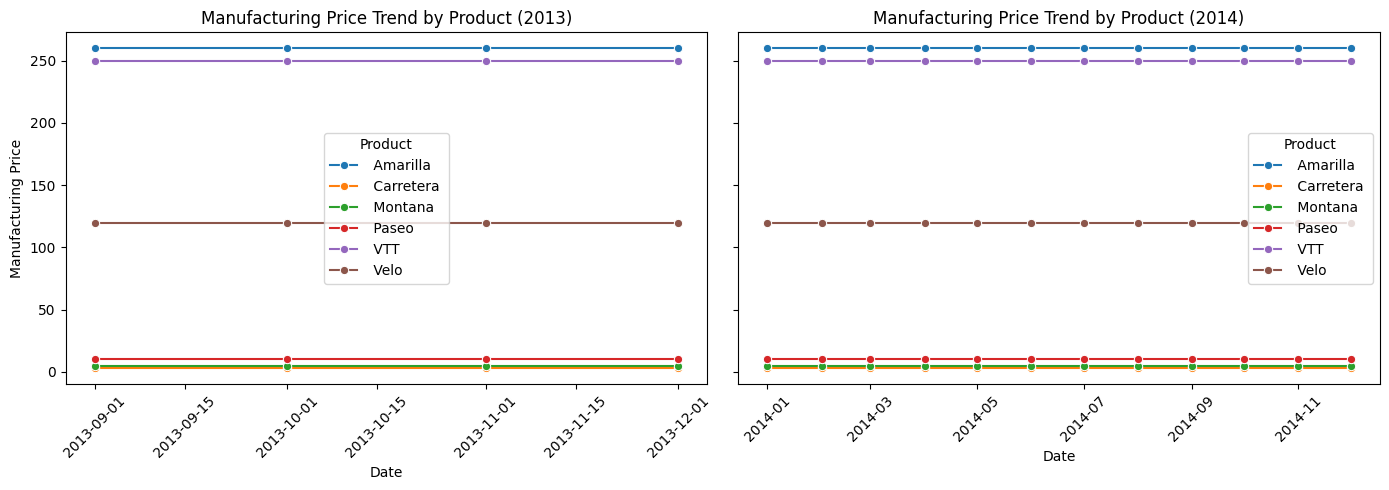

In [ ]:
#Monthly Seasonality Pattern by Product (Manufacturing Price)
df_product = df.groupby(['Year','Date','Product'])['Manufacturing Price'].mean().reset_index()

df_2013_product = df_product[df_product['Year']==2013]
df_2014_product = df_product[df_product['Year']==2014]

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

sns.lineplot(data=df_2013_product, x='Date', y='Manufacturing Price', hue='Product', marker='o', ax=axes[0])
axes[0].set_title("Manufacturing Price Trend by Product (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_product, x='Date', y='Manufacturing Price', hue='Product', marker='o', ax=axes[1])
axes[1].set_title("Manufacturing Price Trend by Product (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

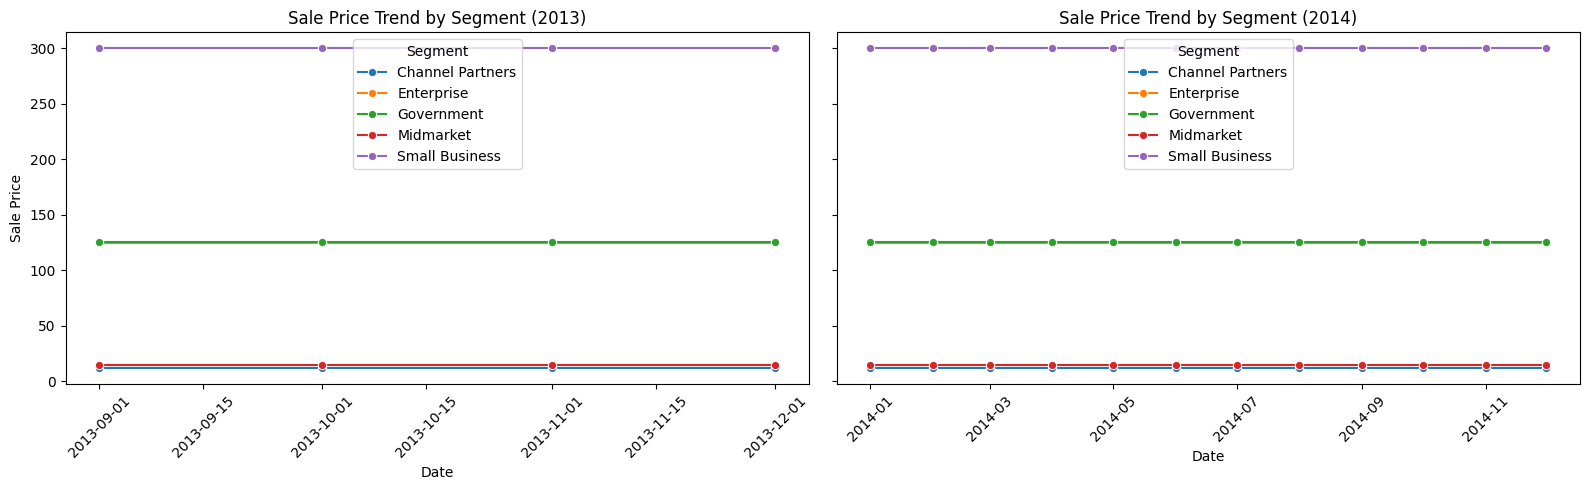

In [ ]:
#Monthly Seasonality Pattern by Segment (Sale Price)
df_date_year_seg = df.groupby(['Year','Date','Segment'])['Sale Price'].mean().reset_index()

df_2013_seg_s = df_date_year_seg[df_date_year_seg['Year'] == 2013]
df_2014_seg_s = df_date_year_seg[df_date_year_seg['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

sns.lineplot(data=df_2013_seg_s, x='Date', y='Sale Price', hue='Segment', marker='o', ax=axes[0])
axes[0].set_title("Sale Price Trend by Segment (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_seg_s, x='Date', y='Sale Price', hue='Segment', marker='o', ax=axes[1])
axes[1].set_title("Sale Price Trend by Segment (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

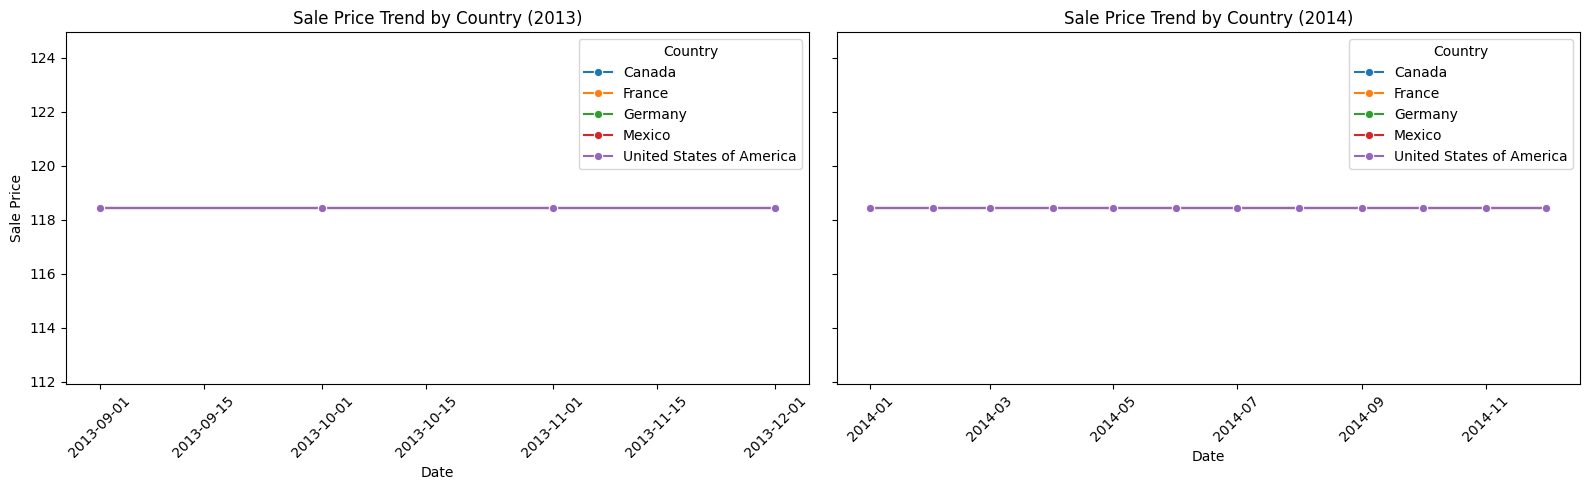

In [ ]:
#Monthly Seasonality Pattern by Country (Sale Price)
df_date_year_country = df.groupby(['Year','Date','Country'])['Sale Price'].mean().reset_index()

df_2013_country_c = df_date_year_country[df_date_year_country['Year'] == 2013]
df_2014_country_c = df_date_year_country[df_date_year_country['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

sns.lineplot(data=df_2013_country_c, x='Date', y='Sale Price', hue='Country', marker='o', ax=axes[0])
axes[0].set_title("Sale Price Trend by Country (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_country_c, x='Date', y='Sale Price', hue='Country', marker='o', ax=axes[1])
axes[1].set_title("Sale Price Trend by Country (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

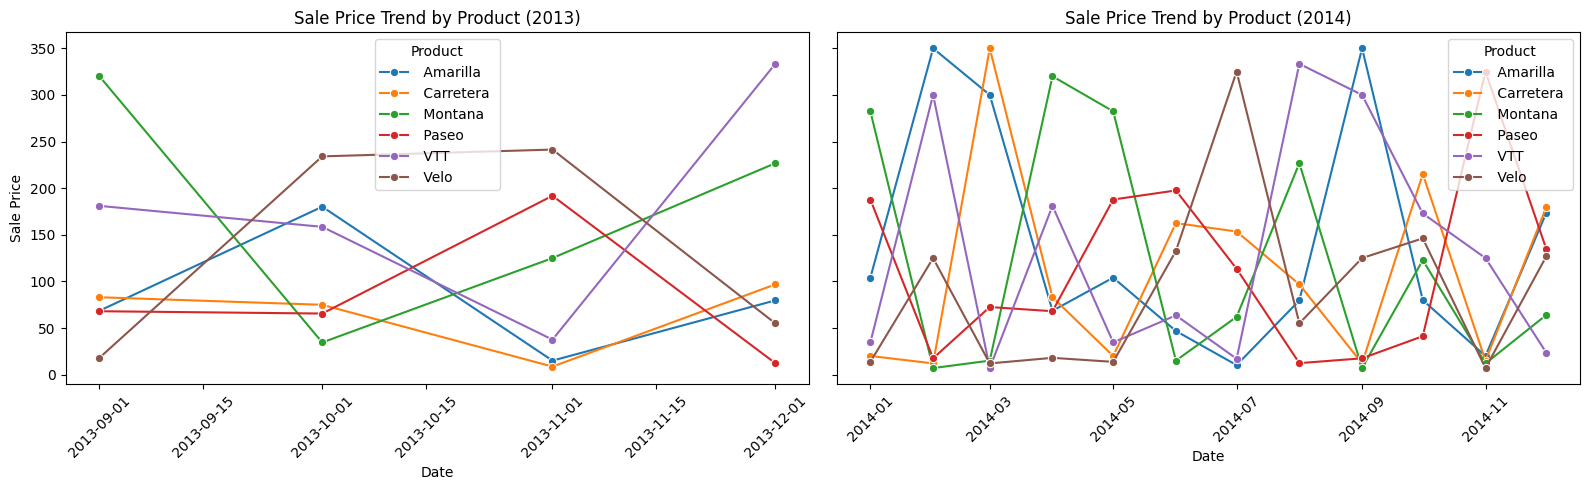

In [ ]:
#Monthly Seasonality Pattern by Product (Sale Price)
df_date_year_product = df.groupby(['Year','Date','Product'])['Sale Price'].mean().reset_index()

df_2013_product_p = df_date_year_product[df_date_year_product['Year'] == 2013]
df_2014_product_p = df_date_year_product[df_date_year_product['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

sns.lineplot(data=df_2013_product_p, x='Date', y='Sale Price', hue='Product', marker='o', ax=axes[0])
axes[0].set_title("Sale Price Trend by Product (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_product_p, x='Date', y='Sale Price', hue='Product', marker='o', ax=axes[1])
axes[1].set_title("Sale Price Trend by Product (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

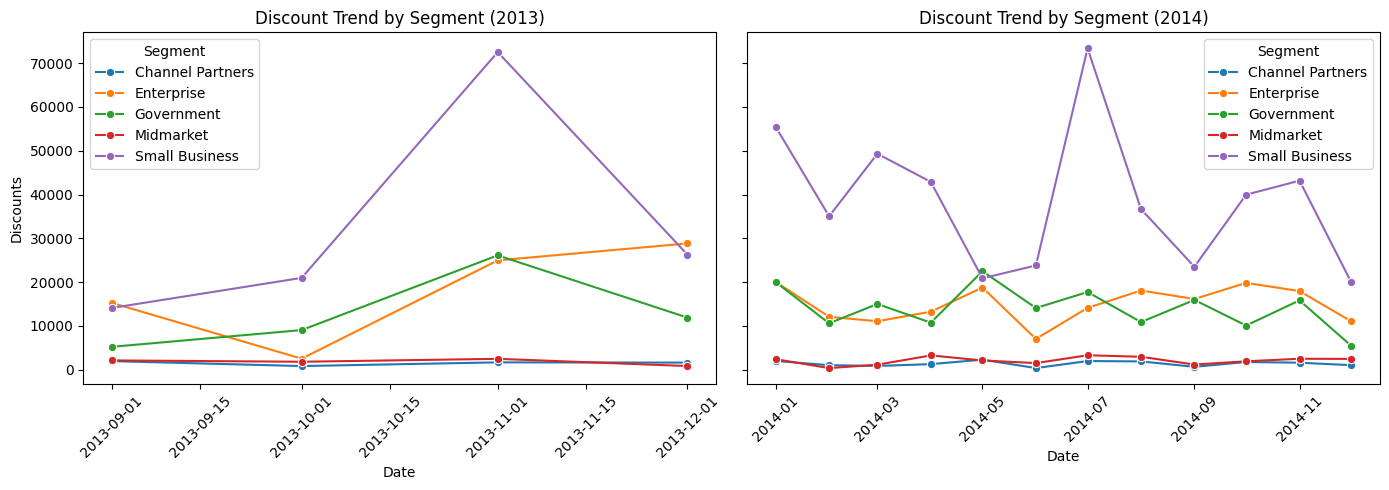

In [ ]:
#Monthly Seasonality Pattern by Segment (Discounts)
df_date_seg = df.groupby(['Year', 'Date', 'Segment'])['Discounts'].mean().reset_index()

df_2013_seg_d = df_date_seg[df_date_seg['Year'] == 2013]
df_2014_seg_d = df_date_seg[df_date_seg['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

sns.lineplot(data=df_2013_seg_d, x='Date', y='Discounts', hue='Segment', marker='o', ax=axes[0])
axes[0].set_title("Discount Trend by Segment (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_seg_d, x='Date', y='Discounts', hue='Segment', marker='o', ax=axes[1])
axes[1].set_title("Discount Trend by Segment (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

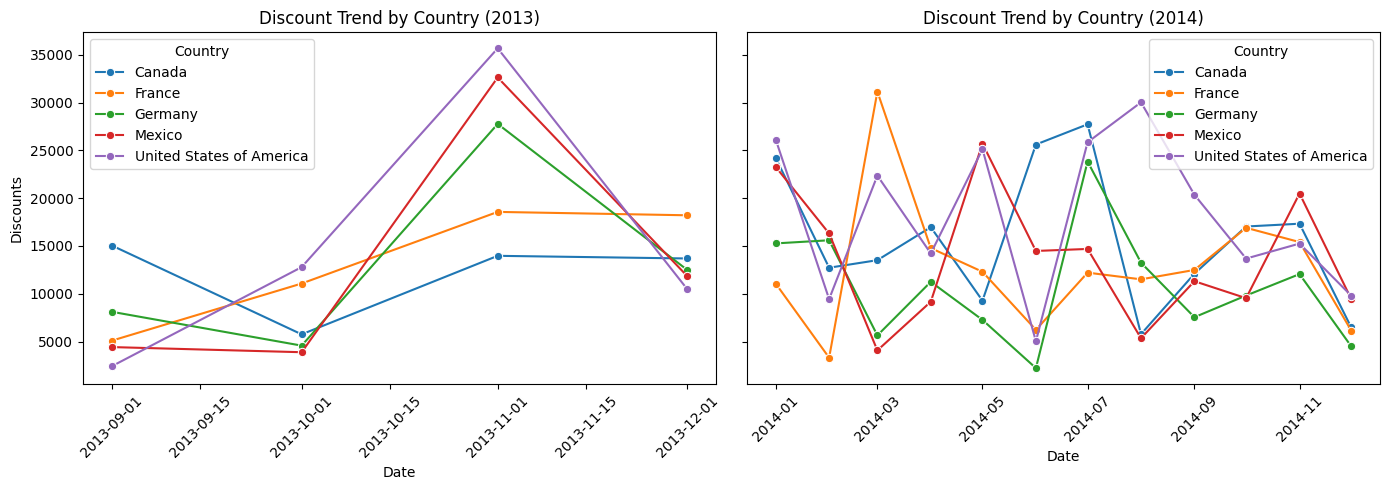

In [ ]:
#Monthly Seasonality Pattern by Country (Discounts)
df_date_country = df.groupby(['Year', 'Date', 'Country'])['Discounts'].mean().reset_index()

df_2013_country_d = df_date_country[df_date_country['Year'] == 2013]
df_2014_country_d = df_date_country[df_date_country['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

sns.lineplot(data=df_2013_country_d, x='Date', y='Discounts', hue='Country', marker='o', ax=axes[0])
axes[0].set_title("Discount Trend by Country (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_country_d, x='Date', y='Discounts', hue='Country', marker='o', ax=axes[1])
axes[1].set_title("Discount Trend by Country (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

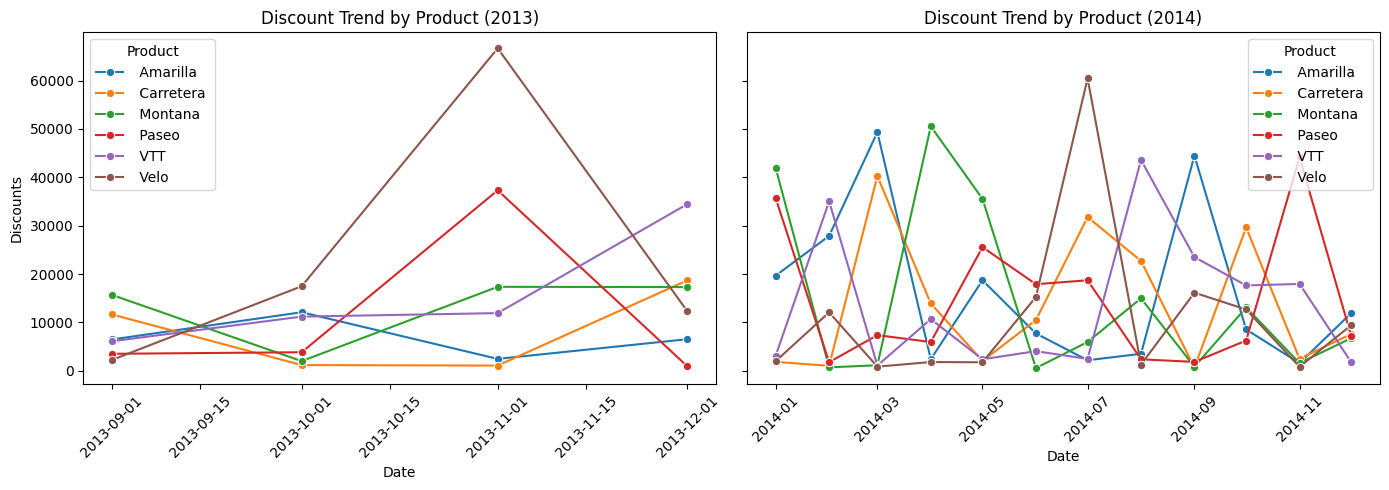

In [ ]:
#Monthly Seasonality Pattern by Product (Discounts)
df_date_product = df.groupby(['Year', 'Date', 'Product'])['Discounts'].mean().reset_index()

df_2013_product_d = df_date_product[df_date_product['Year'] == 2013]
df_2014_product_d = df_date_product[df_date_product['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

sns.lineplot(data=df_2013_product_d, x='Date', y='Discounts', hue='Product', marker='o', ax=axes[0])
axes[0].set_title("Discount Trend by Product (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_product_d, x='Date', y='Discounts', hue='Product', marker='o', ax=axes[1])
axes[1].set_title("Discount Trend by Product (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

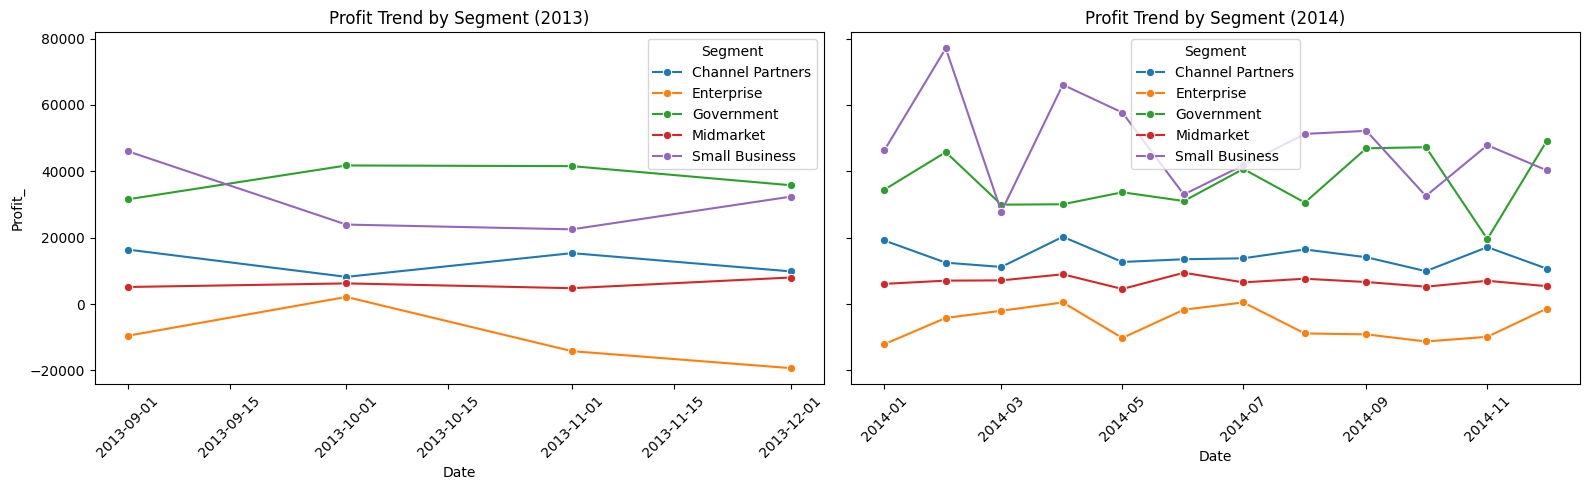

In [ ]:
#Monthly Seasonality Pattern by Segment (Profit)
df_date_year_seg = df.groupby(['Year', 'Date', 'Segment'])['Profit_'].mean().reset_index()

df_2013_seg_p = df_date_year_seg[df_date_year_seg['Year'] == 2013]
df_2014_seg_p = df_date_year_seg[df_date_year_seg['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

sns.lineplot(data=df_2013_seg_p, x='Date', y='Profit_', hue='Segment', marker='o', ax=axes[0])
axes[0].set_title("Profit Trend by Segment (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_seg_p, x='Date', y='Profit_', hue='Segment', marker='o', ax=axes[1])
axes[1].set_title("Profit Trend by Segment (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

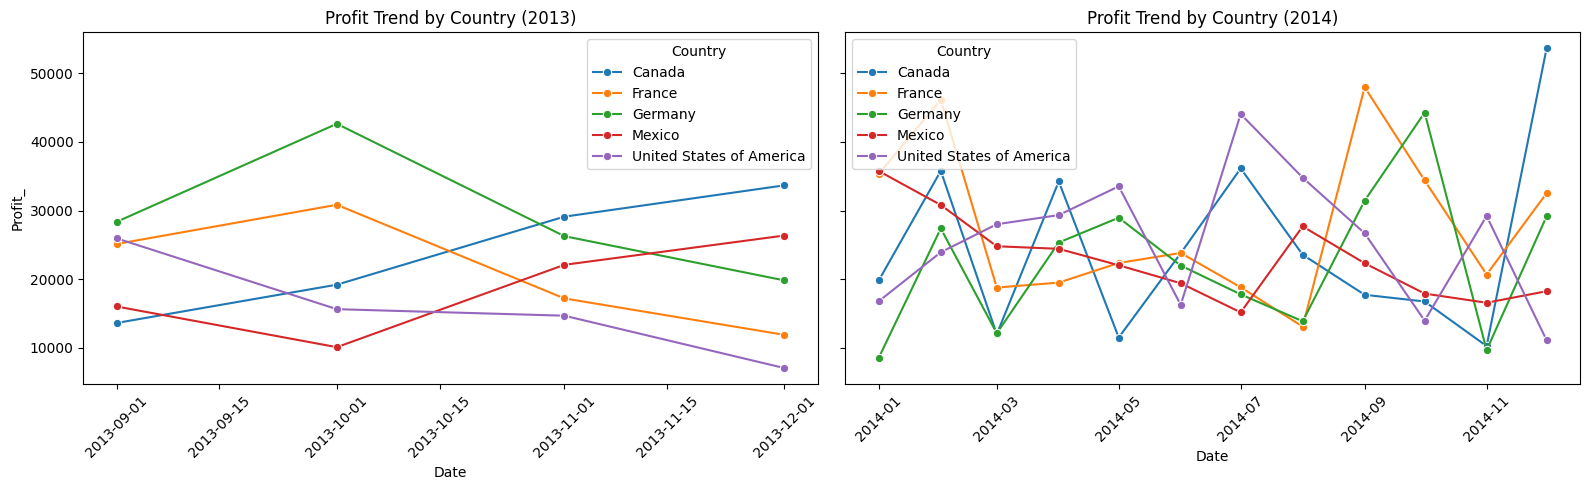

In [ ]:
#Monthly Seasonality Pattern by Country (Profit)
df_date_year_country = df.groupby(['Year', 'Date', 'Country'])['Profit_'].mean().reset_index()

df_2013_country1 = df_date_year_country[df_date_year_country['Year'] == 2013]
df_2014_country2 = df_date_year_country[df_date_year_country['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

sns.lineplot(data=df_2013_country1, x='Date', y='Profit_', hue='Country', marker='o', ax=axes[0])
axes[0].set_title("Profit Trend by Country (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_country2, x='Date', y='Profit_', hue='Country', marker='o', ax=axes[1])
axes[1].set_title("Profit Trend by Country (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

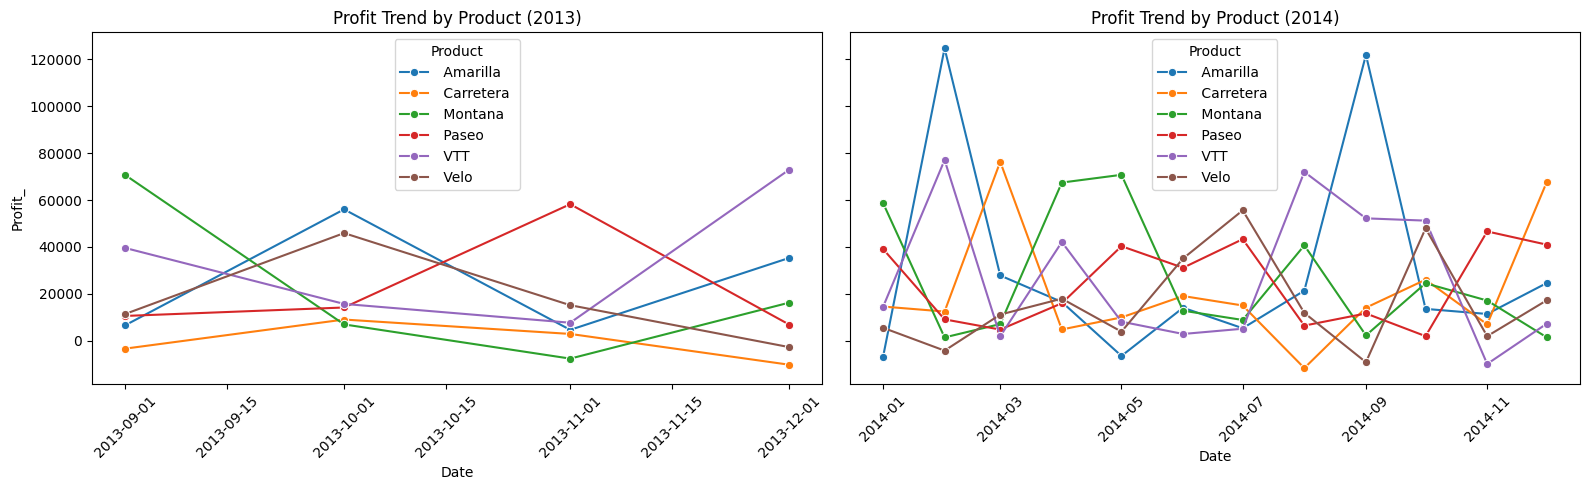

In [ ]:
#Monthly Seasonality Pattern by Product (Profit)
df_date_year_product = df.groupby(['Year', 'Date', 'Product'])['Profit_'].mean().reset_index()

df_2013_product_pr = df_date_year_product[df_date_year_product['Year'] == 2013]
df_2014_product_pr = df_date_year_product[df_date_year_product['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

sns.lineplot(data=df_2013_product_pr, x='Date', y='Profit_', hue='Product', marker='o', ax=axes[0])
axes[0].set_title("Profit Trend by Product (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_product_pr, x='Date', y='Profit_', hue='Product', marker='o', ax=axes[1])
axes[1].set_title("Profit Trend by Product (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

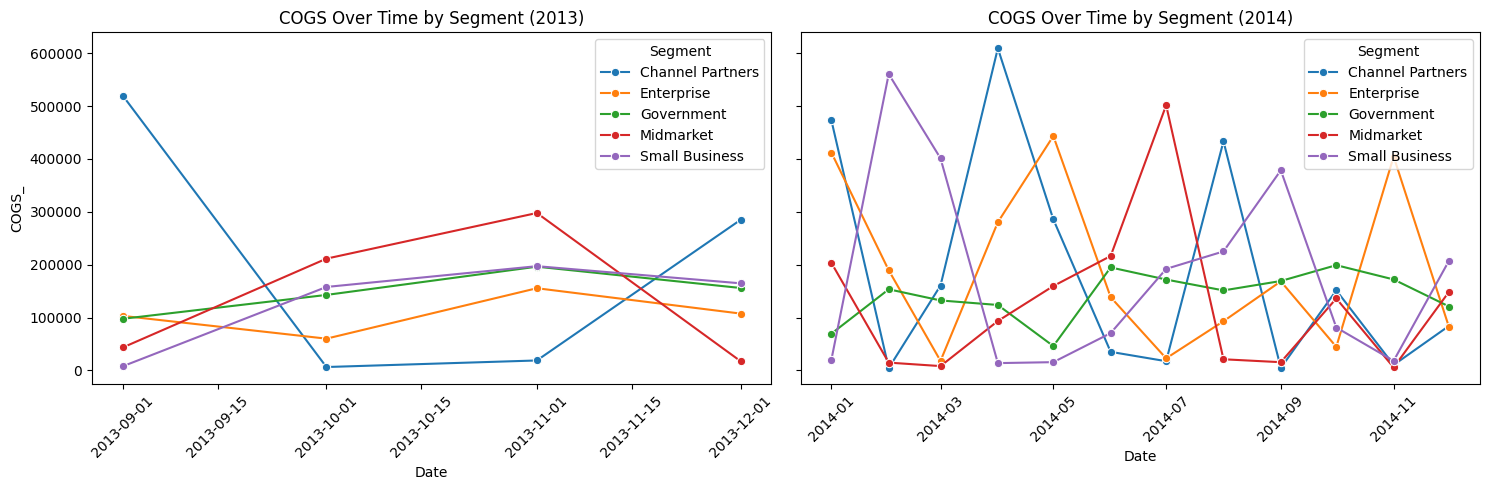

In [ ]:
#Monthly Seasonality Pattern by Segment (COGS)
df_date_year_seg = df.groupby(['Year', 'Date', 'Segment'])['COGS_'].mean().reset_index()

df_2013_seg1 = df_date_year_seg[df_date_year_seg['Year'] == 2013]
df_2014_seg2 = df_date_year_seg[df_date_year_seg['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)

sns.lineplot(data=df_2013_seg1, x='Date', y='COGS_', hue='Segment', marker='o', ax=axes[0])
axes[0].set_title("COGS Over Time by Segment (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_seg2, x='Date', y='COGS_', hue='Segment', marker='o', ax=axes[1])
axes[1].set_title("COGS Over Time by Segment (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

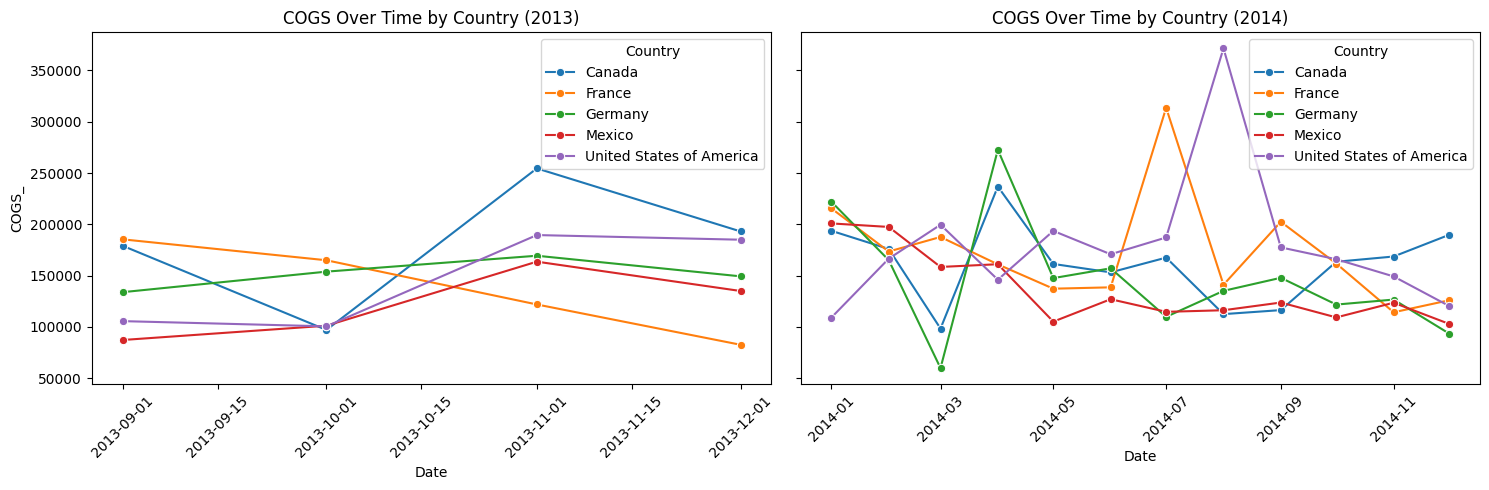

In [ ]:
#Monthly Seasonality Pattern by Country (COGS)
df_date_year_country = df.groupby(['Year', 'Date', 'Country'])['COGS_'].mean().reset_index()

df_2013_country3 = df_date_year_country[df_date_year_country['Year'] == 2013]
df_2014_country4 = df_date_year_country[df_date_year_country['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)

sns.lineplot(data=df_2013_country3, x='Date', y='COGS_', hue='Country', marker='o', ax=axes[0])
axes[0].set_title("COGS Over Time by Country (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_country4, x='Date', y='COGS_', hue='Country', marker='o', ax=axes[1])
axes[1].set_title("COGS Over Time by Country (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

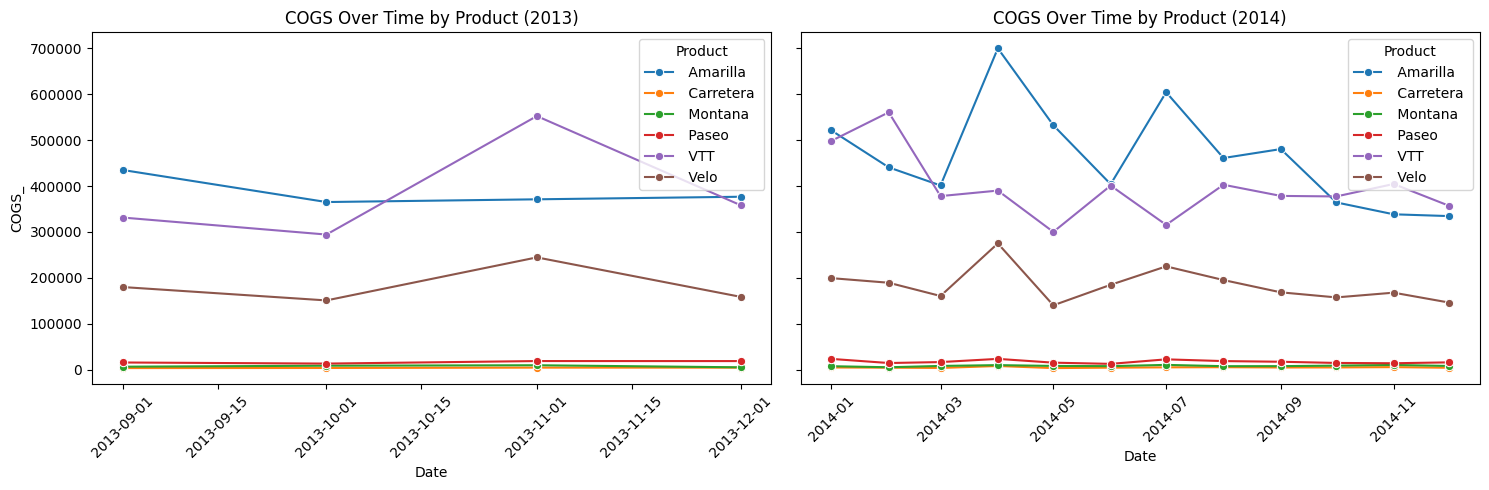

In [ ]:
#Monthly Seasonality Pattern by Product (COGS)
df_date_year_product = df.groupby(['Year', 'Date', 'Product'])['COGS_'].mean().reset_index()

df_2013_product_COGS = df_date_year_product[df_date_year_product['Year'] == 2013]
df_2014_product_COGS = df_date_year_product[df_date_year_product['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=True)

sns.lineplot(data=df_2013_product_COGS, x='Date', y='COGS_', hue='Product', marker='o', ax=axes[0])
axes[0].set_title("COGS Over Time by Product (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_product_COGS, x='Date', y='COGS_', hue='Product', marker='o', ax=axes[1])
axes[1].set_title("COGS Over Time by Product (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

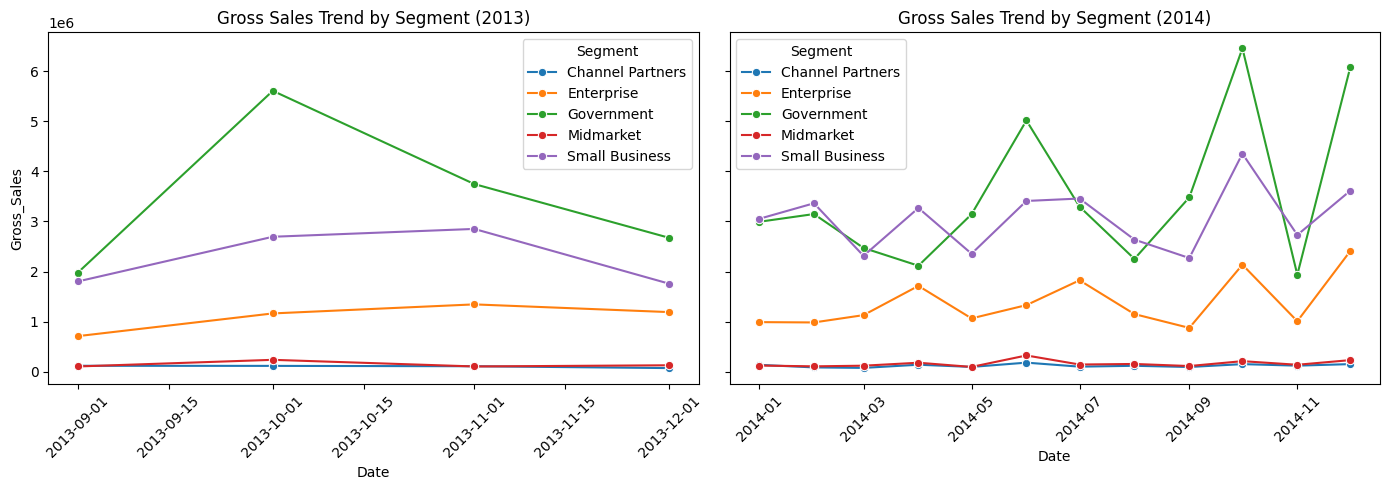

In [ ]:
#Monthly Seasonality Pattern by Segment (Gross sales)
df_date_seg = df.groupby(['Year', 'Date', 'Segment'])['Gross_Sales'].sum().reset_index()

df_2013_seg_gs = df_date_seg[df_date_seg['Year'] == 2013]
df_2014_seg_gs = df_date_seg[df_date_seg['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

sns.lineplot(data=df_2013_seg_gs, x='Date', y='Gross_Sales', hue='Segment', marker='o', ax=axes[0])
axes[0].set_title("Gross Sales Trend by Segment (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_seg_gs, x='Date', y='Gross_Sales', hue='Segment', marker='o', ax=axes[1])
axes[1].set_title("Gross Sales Trend by Segment (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

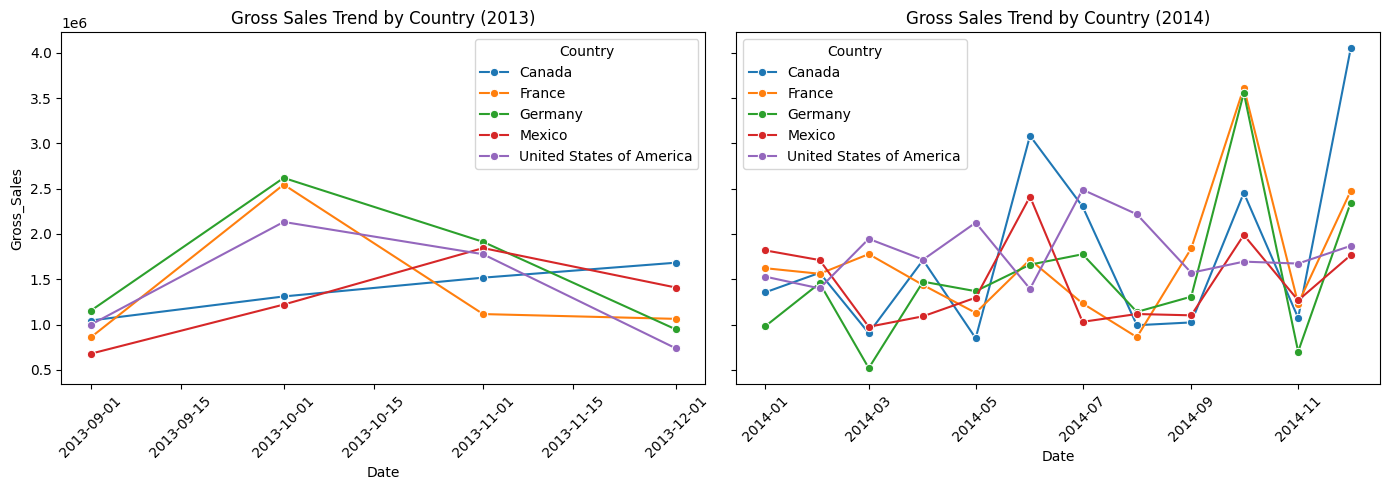

In [ ]:
#Monthly Seasonality Pattern by Country (Gross sales)
df_date_country = df.groupby(['Year', 'Date', 'Country'])['Gross_Sales'].sum().reset_index()

df_2013_country_gs = df_date_country[df_date_country['Year'] == 2013]
df_2014_country_gs = df_date_country[df_date_country['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

sns.lineplot(data=df_2013_country_gs, x='Date', y='Gross_Sales', hue='Country', marker='o', ax=axes[0])
axes[0].set_title("Gross Sales Trend by Country (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_country_gs, x='Date', y='Gross_Sales', hue='Country', marker='o', ax=axes[1])
axes[1].set_title("Gross Sales Trend by Country (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

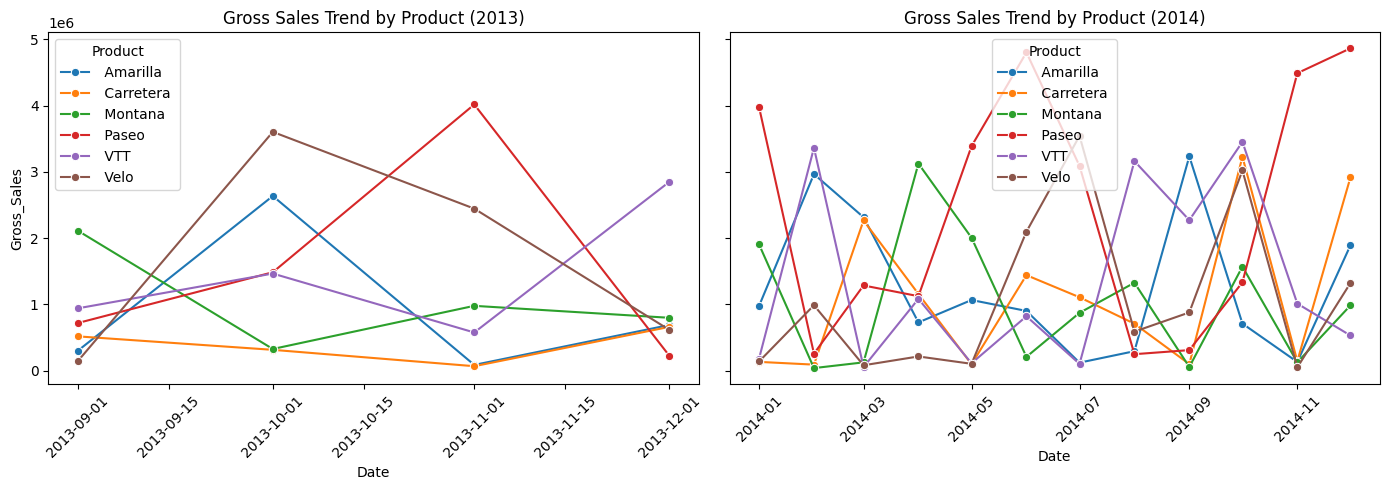

In [ ]:
#Monthly Seasonality Pattern by Product (Gross sales)
df_date_product = df.groupby(['Year', 'Date', 'Product'])['Gross_Sales'].sum().reset_index()

df_2013_product_5 = df_date_product[df_date_product['Year'] == 2013]
df_2014_product_6 = df_date_product[df_date_product['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

sns.lineplot(data=df_2013_product_5, x='Date', y='Gross_Sales', hue='Product', marker='o', ax=axes[0])
axes[0].set_title("Gross Sales Trend by Product (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_product_6, x='Date', y='Gross_Sales', hue='Product', marker='o', ax=axes[1])
axes[1].set_title("Gross Sales Trend by Product (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

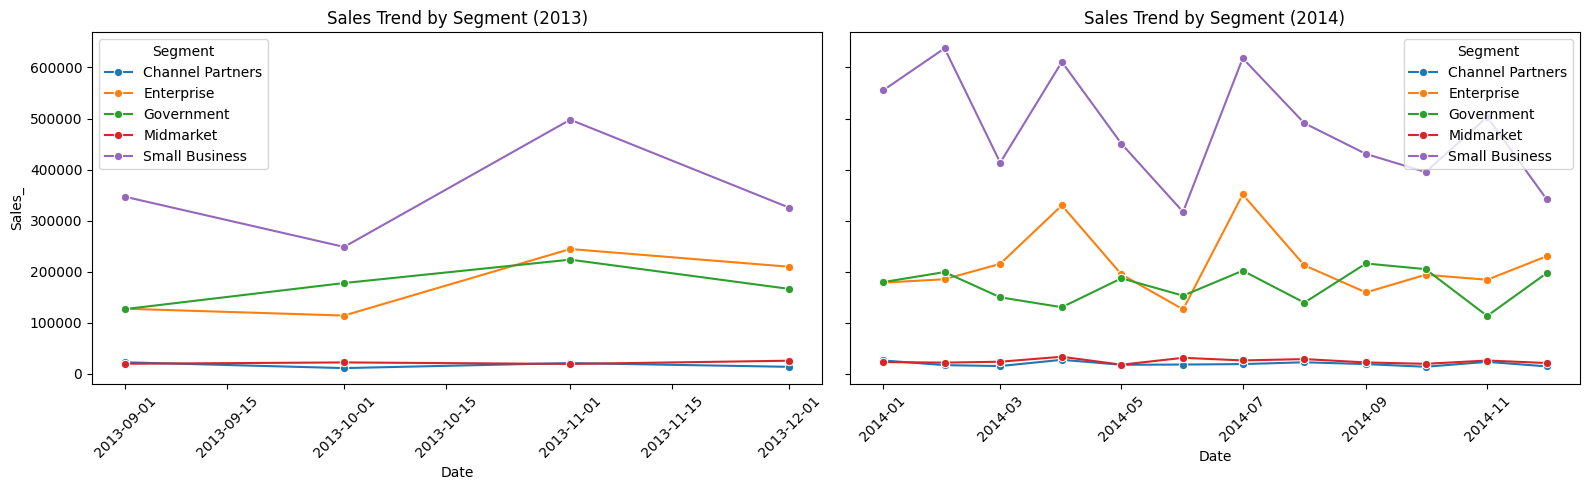

In [ ]:
#Monthly Seasonality Pattern by Segment (sales)
df_date_seg = df.groupby(['Year', 'Date', 'Segment'])['Sales_'].mean().reset_index()

df_2013_seg_sales = df_date_seg[df_date_seg['Year'] == 2013]
df_2014_seg_sales = df_date_seg[df_date_seg['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

sns.lineplot(data=df_2013_seg_sales, x='Date', y='Sales_', hue='Segment', ax=axes[0], marker='o')
axes[0].set_title("Sales Trend by Segment (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_seg_sales, x='Date', y='Sales_', hue='Segment', ax=axes[1], marker='o')
axes[1].set_title("Sales Trend by Segment (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

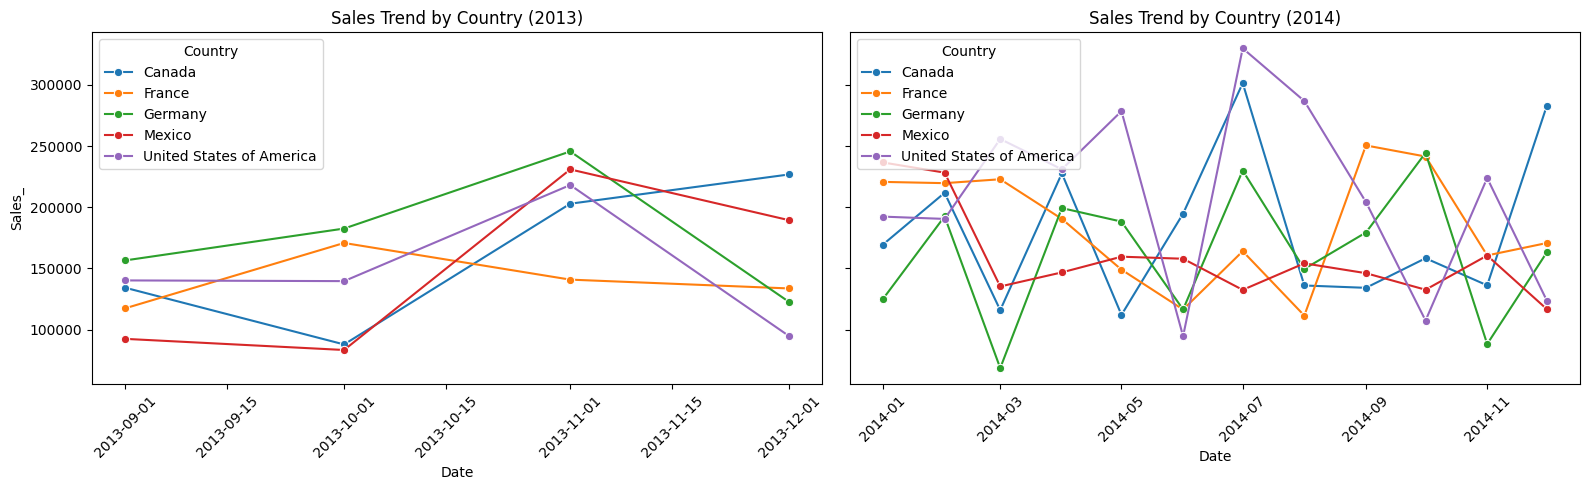

In [ ]:
#Monthly Seasonality Pattern by Country (sales)
df_date_country = df.groupby(['Year', 'Date', 'Country'])['Sales_'].mean().reset_index()

df_2013_country_cc = df_date_country[df_date_country['Year'] == 2013]
df_2014_country_cc = df_date_country[df_date_country['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

sns.lineplot(data=df_2013_country_cc, x='Date', y='Sales_', hue='Country', ax=axes[0], marker='o')
axes[0].set_title("Sales Trend by Country (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_country_cc, x='Date', y='Sales_', hue='Country', ax=axes[1], marker='o')
axes[1].set_title("Sales Trend by Country (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

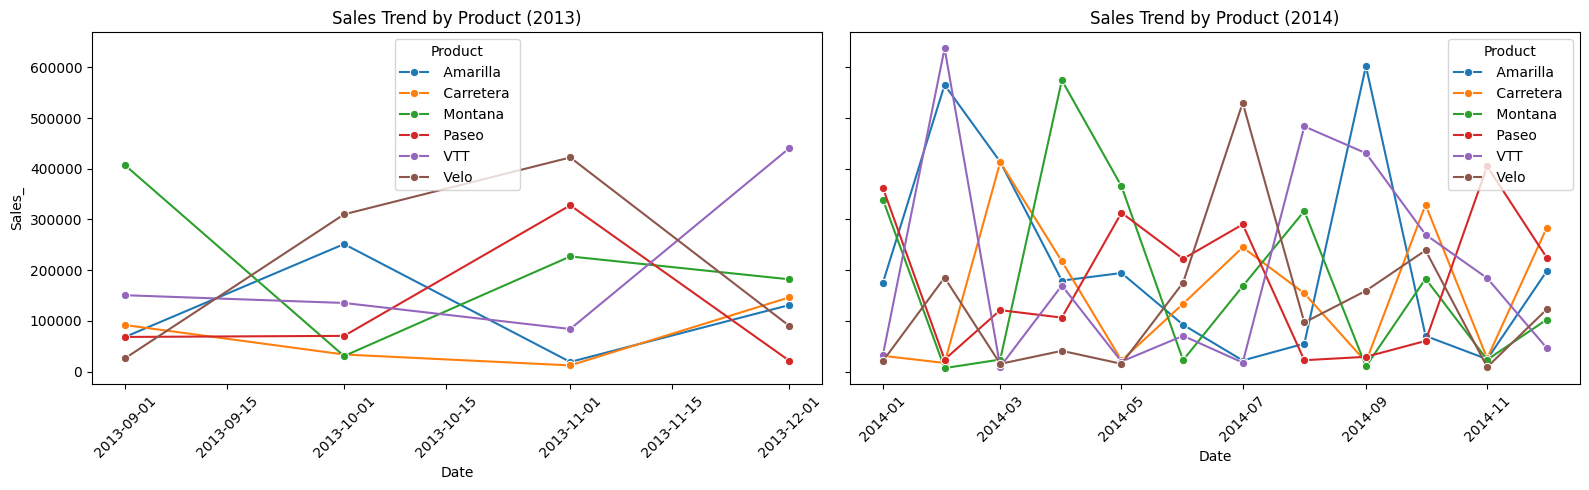

In [ ]:
#Monthly Seasonality Pattern by Product (sales)
df_date_product = df.groupby(['Year', 'Date', 'Product'])['Sales_'].mean().reset_index()

df_2013_product_sal = df_date_product[df_date_product['Year'] == 2013]
df_2014_product_sal = df_date_product[df_date_product['Year'] == 2014]

fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)

sns.lineplot(data=df_2013_product_sal, x='Date', y='Sales_', hue='Product', ax=axes[0], marker='o')
axes[0].set_title("Sales Trend by Product (2013)")
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=df_2014_product_sal, x='Date', y='Sales_', hue='Product', ax=axes[1], marker='o')
axes[1].set_title("Sales Trend by Product (2014)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()